# merge 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
df_trd= pd.read_feather("../data/make_data/df_trd_merged.feather")
df_anc= pd.read_feather("../data/make_data/df_anc_merged.feather")
df_mst= pd.read_feather("../data/make_data/df_mst.feather")
df_hkd= pd.read_feather("../data/make_data/df_hkd.feather")
df_soc= pd.read_feather("../data/make_data/df_soc.feather")

In [2]:
df_trd.columns

Index(['아파트코드', '아파트명', '도로명주소', '법정동코드', '기준년월', '면적코드', '거래량', '누적거래량',
       '회전율', '면적코드별최소실거래가',
       ...
       '아파트단지내표고최고값', '아파트단지인근표고평균값', '아파트단지인근표고최저값', '아파트단지인근표고최고값',
       '근접 고도 지점 거리', 'cpi', '경제심리지수(원계열)', '기존_가계대출', '신규_가계대출', '기준금리'],
      dtype='object', length=113)

In [3]:
df_trd['부속복리시설'] = df_trd['부속복리시설'].fillna('empty')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

df_trd.columns

Index(['아파트코드', '아파트명', '도로명주소', '법정동코드', '기준년월', '면적코드', '거래량', '누적거래량',
       '회전율', '면적코드별최소실거래가', '면적코드별최대실거래가', '면적코드별평균실거래가', '면적코드별중위실거래가',
       '최근거래일자', '거래동향', '인근아파트거래동향', '해당읍면동거래동향', '경도', '위도', '기준연도', '세대수',
       '사용승인일자', '분양유형', '동수', '복도유형', '시공기업명', '건물구조', '승강기수', '지상주차대수',
       '지하주차대수', 'CCTV수', '부속복리시설', '학군정보', '교차집계구총인구수', '교차집계구생산인구수',
       '교차집계구유소년인구수', '교차집계구노년인구수', '인구밀도', '인구밀도지표', '총부양비', '유소년부양비',
       '노년부양비', '노령화지수', '연령구조지표', '지하철역까지_거리', '지하철역명', '호선', '공원수', '공원총면적',
       '환경생활지수', '환경평가점수', '아파트단지내경사도평균값', '아파트단지내경사도최저값', '아파트단지내경사도최고값',
       '아파트단지인근경사도평균값', '아파트단지인근경사도최저값', '아파트단지인근경사도최고값', '차량접근가능시설수',
       '5분_car', '10분_car', '15분_car', '20분_car', '25분_car', '30분_car',
       '35분_car', '40분_car', '45분_car', '50분_car', '55분_car', '60분_car',
       '도보접근가능시설수', '1분_walk', '2분_walk', '3분_walk', '4분_walk', '5분_walk',
       '6분_walk', '7분_walk', '8분_walk', '9분_walk', '10분_walk', '11분_walk',
       '12분_walk', '13분_walk', '14분_w

In [5]:
df_trd['15_car'] = df_trd['5분_car'] + df_trd['10분_car'] + df_trd['15분_car']
df_trd['30_car'] = df_trd['15_car'] + df_trd['20분_car'] + df_trd['25분_car'] + df_trd['30분_car']
df_trd['45_car'] = df_trd['30_car'] + df_trd['35분_car'] + df_trd['40분_car'] + df_trd['45분_car']
df_trd['60_car'] = df_trd['45_car'] + df_trd['50분_car'] + df_trd['55분_car'] + df_trd['60분_car']
df_trd['5_walk'] = df_trd['1분_walk'] + df_trd['2분_walk'] + df_trd['3분_walk'] + df_trd['4분_walk'] + df_trd['5분_walk']
df_trd['10_walk'] = df_trd['5_walk'] + df_trd['6분_walk'] + df_trd['7분_walk'] + df_trd['8분_walk'] + df_trd['9분_walk'] + df_trd['10분_walk']
df_trd['20_walk'] = df_trd['10_walk'] + df_trd['11분_walk'] + df_trd['12분_walk'] + df_trd['13분_walk'] + df_trd['14분_walk'] + df_trd['15분_walk'] + df_trd['16분_walk'] + df_trd['17분_walk'] + df_trd['18분_walk'] + df_trd['19분_walk'] + df_trd['20분_walk']
df_trd['30_walk'] = df_trd['20_walk'] + df_trd['21분_walk'] + df_trd['22분_walk'] + df_trd['23분_walk'] + df_trd['24분_walk'] + df_trd['25분_walk'] + df_trd['26분_walk'] + df_trd['27분_walk'] + df_trd['28분_walk'] + df_trd['29분_walk'] + df_trd['30분_walk']

In [6]:
df_trd.drop(columns=[ '5분_car', '10분_car', '15분_car', '20분_car', '25분_car', '30분_car',
       '35분_car', '40분_car', '45분_car', '50분_car', '55분_car', '60분_car',
       '도보접근가능시설수', '1분_walk', '2분_walk', '3분_walk', '4분_walk', '5분_walk',
       '6분_walk', '7분_walk', '8분_walk', '9분_walk', '10분_walk', '11분_walk',
       '12분_walk', '13분_walk', '14분_walk', '15분_walk', '16분_walk', '17분_walk',
       '18분_walk', '19분_walk', '20분_walk', '21분_walk', '22분_walk', '23분_walk',
       '24분_walk', '25분_walk', '26분_walk', '27분_walk', '28분_walk', '29분_walk',
       '30분_walk','경도','위도'],axis=1, inplace=True)


In [7]:
df_trd['자치구명'] = df_trd['도로명주소'].apply(lambda x: x.split(' ')[1])

In [8]:
df_trd = df_trd[df_trd['거래량']>0]

In [9]:
df_trd.columns

Index(['아파트코드', '아파트명', '도로명주소', '법정동코드', '기준년월', '면적코드', '거래량', '누적거래량',
       '회전율', '면적코드별최소실거래가', '면적코드별최대실거래가', '면적코드별평균실거래가', '면적코드별중위실거래가',
       '최근거래일자', '거래동향', '인근아파트거래동향', '해당읍면동거래동향', '기준연도', '세대수', '사용승인일자',
       '분양유형', '동수', '복도유형', '시공기업명', '건물구조', '승강기수', '지상주차대수', '지하주차대수',
       'CCTV수', '부속복리시설', '학군정보', '교차집계구총인구수', '교차집계구생산인구수', '교차집계구유소년인구수',
       '교차집계구노년인구수', '인구밀도', '인구밀도지표', '총부양비', '유소년부양비', '노년부양비', '노령화지수',
       '연령구조지표', '지하철역까지_거리', '지하철역명', '호선', '공원수', '공원총면적', '환경생활지수',
       '환경평가점수', '아파트단지내경사도평균값', '아파트단지내경사도최저값', '아파트단지내경사도최고값',
       '아파트단지인근경사도평균값', '아파트단지인근경사도최저값', '아파트단지인근경사도최고값', '차량접근가능시설수',
       '아파트단지내표고평균값', '아파트단지내표고최저값', '아파트단지내표고최고값', '아파트단지인근표고평균값',
       '아파트단지인근표고최저값', '아파트단지인근표고최고값', '근접 고도 지점 거리', 'cpi', '경제심리지수(원계열)',
       '기존_가계대출', '신규_가계대출', '기준금리', '15_car', '30_car', '45_car', '60_car',
       '5_walk', '10_walk', '20_walk', '30_walk', '자치구명'],
      dtype='object')

In [10]:
trd_col = df_trd.isna().sum()
print(len(df_trd))
trd_col[trd_col>0]

29335


거래동향           8358
인근아파트거래동향      1047
해당읍면동거래동향       637
세대수              85
사용승인일자          140
분양유형           8695
동수              979
복도유형           8698
시공기업명          8717
건물구조           1461
승강기수            979
지상주차대수         8906
지하주차대수         8912
CCTV수          8912
학군정보             15
교차집계구총인구수        19
교차집계구생산인구수       19
교차집계구유소년인구수      19
교차집계구노년인구수       19
인구밀도             19
인구밀도지표           15
총부양비             15
유소년부양비           15
노년부양비            15
노령화지수            15
연령구조지표           15
dtype: int64

###### 거래동향 변수는 결측치 대체가 어려운 것을 판단, drop

# 전처리 된 데이터 시각화 및 분석

In [11]:
df_trd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29335 entries, 115 to 385487
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   아파트코드          29335 non-null  object 
 1   아파트명           29335 non-null  object 
 2   도로명주소          29335 non-null  object 
 3   법정동코드          29335 non-null  int64  
 4   기준년월           29335 non-null  int64  
 5   면적코드           29335 non-null  int64  
 6   거래량            29335 non-null  int64  
 7   누적거래량          29335 non-null  int64  
 8   회전율            29335 non-null  float64
 9   면적코드별최소실거래가    29335 non-null  int64  
 10  면적코드별최대실거래가    29335 non-null  int64  
 11  면적코드별평균실거래가    29335 non-null  int64  
 12  면적코드별중위실거래가    29335 non-null  int64  
 13  최근거래일자         29335 non-null  int64  
 14  거래동향           20977 non-null  object 
 15  인근아파트거래동향      28288 non-null  object 
 16  해당읍면동거래동향      28698 non-null  object 
 17  기준연도           29335 non-null  int64  
 18  세대수

In [12]:
df_trd['인근-단지 경사도 평균값'] = df_trd['아파트단지내경사도평균값'] - df_trd['아파트단지인근경사도평균값']
df_trd['인근-단지 경사도 최고값'] = df_trd['아파트단지내경사도최고값'] - df_trd['아파트단지인근경사도최고값']
df_trd['인근-단지 경사도 최저값'] = df_trd['아파트단지내경사도최저값'] - df_trd['아파트단지인근경사도최저값']

df_trd['인근-단지 인근표고 평균값'] = df_trd['아파트단지내표고평균값'] - df_trd['아파트단지인근표고평균값']
df_trd['인근-단지 인근표고 최저값'] = df_trd['아파트단지내표고최저값'] - df_trd['아파트단지인근표고최저값']
df_trd['인근-단지 인근표고 최고값'] = df_trd['아파트단지내표고최고값'] - df_trd['아파트단지인근표고최고값']

df_trd.drop(columns=['아파트단지인근경사도평균값','아파트단지내경사도평균값','아파트단지인근경사도최저값','아파트단지내경사도최저값','아파트단지인근경사도최고값','아파트단지내경사도최고값','아파트단지인근표고최저값','아파트단지내표고최저값','아파트단지인근표고최고값','아파트단지내표고최고값'],inplace=True)



In [13]:
df_trd.columns

Index(['아파트코드', '아파트명', '도로명주소', '법정동코드', '기준년월', '면적코드', '거래량', '누적거래량',
       '회전율', '면적코드별최소실거래가', '면적코드별최대실거래가', '면적코드별평균실거래가', '면적코드별중위실거래가',
       '최근거래일자', '거래동향', '인근아파트거래동향', '해당읍면동거래동향', '기준연도', '세대수', '사용승인일자',
       '분양유형', '동수', '복도유형', '시공기업명', '건물구조', '승강기수', '지상주차대수', '지하주차대수',
       'CCTV수', '부속복리시설', '학군정보', '교차집계구총인구수', '교차집계구생산인구수', '교차집계구유소년인구수',
       '교차집계구노년인구수', '인구밀도', '인구밀도지표', '총부양비', '유소년부양비', '노년부양비', '노령화지수',
       '연령구조지표', '지하철역까지_거리', '지하철역명', '호선', '공원수', '공원총면적', '환경생활지수',
       '환경평가점수', '차량접근가능시설수', '아파트단지내표고평균값', '아파트단지인근표고평균값', '근접 고도 지점 거리',
       'cpi', '경제심리지수(원계열)', '기존_가계대출', '신규_가계대출', '기준금리', '15_car', '30_car',
       '45_car', '60_car', '5_walk', '10_walk', '20_walk', '30_walk', '자치구명',
       '인근-단지 경사도 평균값', '인근-단지 경사도 최고값', '인근-단지 경사도 최저값', '인근-단지 인근표고 평균값',
       '인근-단지 인근표고 최저값', '인근-단지 인근표고 최고값'],
      dtype='object')

In [14]:
df_trd.drop(columns=['아파트코드', '아파트명', '도로명주소', '법정동코드', '기준년월', '복도유형', '시공기업명', '건물구조','학군정보','지하철역명','부속복리시설','분양유형','인근아파트거래동향','해당읍면동거래동향','거래동향','면적코드별최소실거래가', '면적코드별최대실거래가','면적코드별중위실거래가',
       '최근거래일자'],inplace=True)

In [15]:
df_trd.columns

Index(['면적코드', '거래량', '누적거래량', '회전율', '면적코드별평균실거래가', '기준연도', '세대수', '사용승인일자',
       '동수', '승강기수', '지상주차대수', '지하주차대수', 'CCTV수', '교차집계구총인구수', '교차집계구생산인구수',
       '교차집계구유소년인구수', '교차집계구노년인구수', '인구밀도', '인구밀도지표', '총부양비', '유소년부양비',
       '노년부양비', '노령화지수', '연령구조지표', '지하철역까지_거리', '호선', '공원수', '공원총면적', '환경생활지수',
       '환경평가점수', '차량접근가능시설수', '아파트단지내표고평균값', '아파트단지인근표고평균값', '근접 고도 지점 거리',
       'cpi', '경제심리지수(원계열)', '기존_가계대출', '신규_가계대출', '기준금리', '15_car', '30_car',
       '45_car', '60_car', '5_walk', '10_walk', '20_walk', '30_walk', '자치구명',
       '인근-단지 경사도 평균값', '인근-단지 경사도 최고값', '인근-단지 경사도 최저값', '인근-단지 인근표고 평균값',
       '인근-단지 인근표고 최저값', '인근-단지 인근표고 최고값'],
      dtype='object')

In [16]:
df_trd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29335 entries, 115 to 385487
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   면적코드            29335 non-null  int64  
 1   거래량             29335 non-null  int64  
 2   누적거래량           29335 non-null  int64  
 3   회전율             29335 non-null  float64
 4   면적코드별평균실거래가     29335 non-null  int64  
 5   기준연도            29335 non-null  int64  
 6   세대수             29250 non-null  float64
 7   사용승인일자          29195 non-null  float64
 8   동수              28356 non-null  float64
 9   승강기수            28356 non-null  float64
 10  지상주차대수          20429 non-null  float64
 11  지하주차대수          20423 non-null  float64
 12  CCTV수           20423 non-null  float64
 13  교차집계구총인구수       29316 non-null  float64
 14  교차집계구생산인구수      29316 non-null  float64
 15  교차집계구유소년인구수     29316 non-null  float64
 16  교차집계구노년인구수      29316 non-null  float64
 17  인구밀도            29316 non-nu

In [17]:
for i in df_trd.columns:
    print("{}의 결측치 비율 : {}".format(i,pd.isna(df_trd[i]).sum()/len(df_trd)))

면적코드의 결측치 비율 : 0.0
거래량의 결측치 비율 : 0.0
누적거래량의 결측치 비율 : 0.0
회전율의 결측치 비율 : 0.0
면적코드별평균실거래가의 결측치 비율 : 0.0
기준연도의 결측치 비율 : 0.0
세대수의 결측치 비율 : 0.0028975626384864497
사용승인일자의 결측치 비율 : 0.00477245611044827
동수의 결측치 비율 : 0.0333731038009204
승강기수의 결측치 비율 : 0.0333731038009204
지상주차대수의 결측치 비율 : 0.30359638656894494
지하주차대수의 결측치 비율 : 0.3038009204022499
CCTV수의 결측치 비율 : 0.3038009204022499
교차집계구총인구수의 결측치 비율 : 0.0006476904721322652
교차집계구생산인구수의 결측치 비율 : 0.0006476904721322652
교차집계구유소년인구수의 결측치 비율 : 0.0006476904721322652
교차집계구노년인구수의 결측치 비율 : 0.0006476904721322652
인구밀도의 결측치 비율 : 0.0006476904721322652
인구밀도지표의 결측치 비율 : 0.0005113345832623146
총부양비의 결측치 비율 : 0.0005113345832623146
유소년부양비의 결측치 비율 : 0.0005113345832623146
노년부양비의 결측치 비율 : 0.0005113345832623146
노령화지수의 결측치 비율 : 0.0005113345832623146
연령구조지표의 결측치 비율 : 0.0005113345832623146
지하철역까지_거리의 결측치 비율 : 0.0
호선의 결측치 비율 : 0.0
공원수의 결측치 비율 : 0.0
공원총면적의 결측치 비율 : 0.0
환경생활지수의 결측치 비율 : 0.0
환경평가점수의 결측치 비율 : 0.0
차량접근가능시설수의 결측치 비율 : 0.0
아파트단지내표고평균값의 결측치 비율 : 0.0
아파트단지인근표고평균값의 결측치 비율 : 

In [18]:
for i in df_trd.columns:
    if pd.isna(df_trd[i]).sum()/len(df_trd) > 0.1:
        df_trd.drop(columns=i,inplace=True)

In [19]:
for i in df_trd.columns:
    print("{}의 결측치 비율 : {}".format(i,pd.isna(df_trd[i]).sum()/len(df_trd)))

면적코드의 결측치 비율 : 0.0
거래량의 결측치 비율 : 0.0
누적거래량의 결측치 비율 : 0.0
회전율의 결측치 비율 : 0.0
면적코드별평균실거래가의 결측치 비율 : 0.0
기준연도의 결측치 비율 : 0.0
세대수의 결측치 비율 : 0.0028975626384864497
사용승인일자의 결측치 비율 : 0.00477245611044827
동수의 결측치 비율 : 0.0333731038009204
승강기수의 결측치 비율 : 0.0333731038009204
교차집계구총인구수의 결측치 비율 : 0.0006476904721322652
교차집계구생산인구수의 결측치 비율 : 0.0006476904721322652
교차집계구유소년인구수의 결측치 비율 : 0.0006476904721322652
교차집계구노년인구수의 결측치 비율 : 0.0006476904721322652
인구밀도의 결측치 비율 : 0.0006476904721322652
인구밀도지표의 결측치 비율 : 0.0005113345832623146
총부양비의 결측치 비율 : 0.0005113345832623146
유소년부양비의 결측치 비율 : 0.0005113345832623146
노년부양비의 결측치 비율 : 0.0005113345832623146
노령화지수의 결측치 비율 : 0.0005113345832623146
연령구조지표의 결측치 비율 : 0.0005113345832623146
지하철역까지_거리의 결측치 비율 : 0.0
호선의 결측치 비율 : 0.0
공원수의 결측치 비율 : 0.0
공원총면적의 결측치 비율 : 0.0
환경생활지수의 결측치 비율 : 0.0
환경평가점수의 결측치 비율 : 0.0
차량접근가능시설수의 결측치 비율 : 0.0
아파트단지내표고평균값의 결측치 비율 : 0.0
아파트단지인근표고평균값의 결측치 비율 : 0.0
근접 고도 지점 거리의 결측치 비율 : 0.0
cpi의 결측치 비율 : 0.0
경제심리지수(원계열)의 결측치 비율 : 0.0
기존_가계대출의 결측치 비율 : 0.0
신규_가계대출의 결측치

<Axes: xlabel='면적코드별평균실거래가', ylabel='Count'>

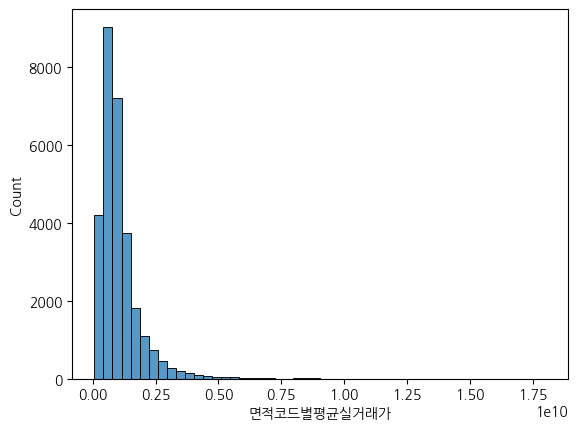

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


sns.histplot(df_trd['면적코드별평균실거래가'], bins=50)

In [21]:
df_trd['target'] = df_trd['면적코드별평균실거래가']
df_trd.drop(columns=['면적코드별평균실거래가'],inplace=True)

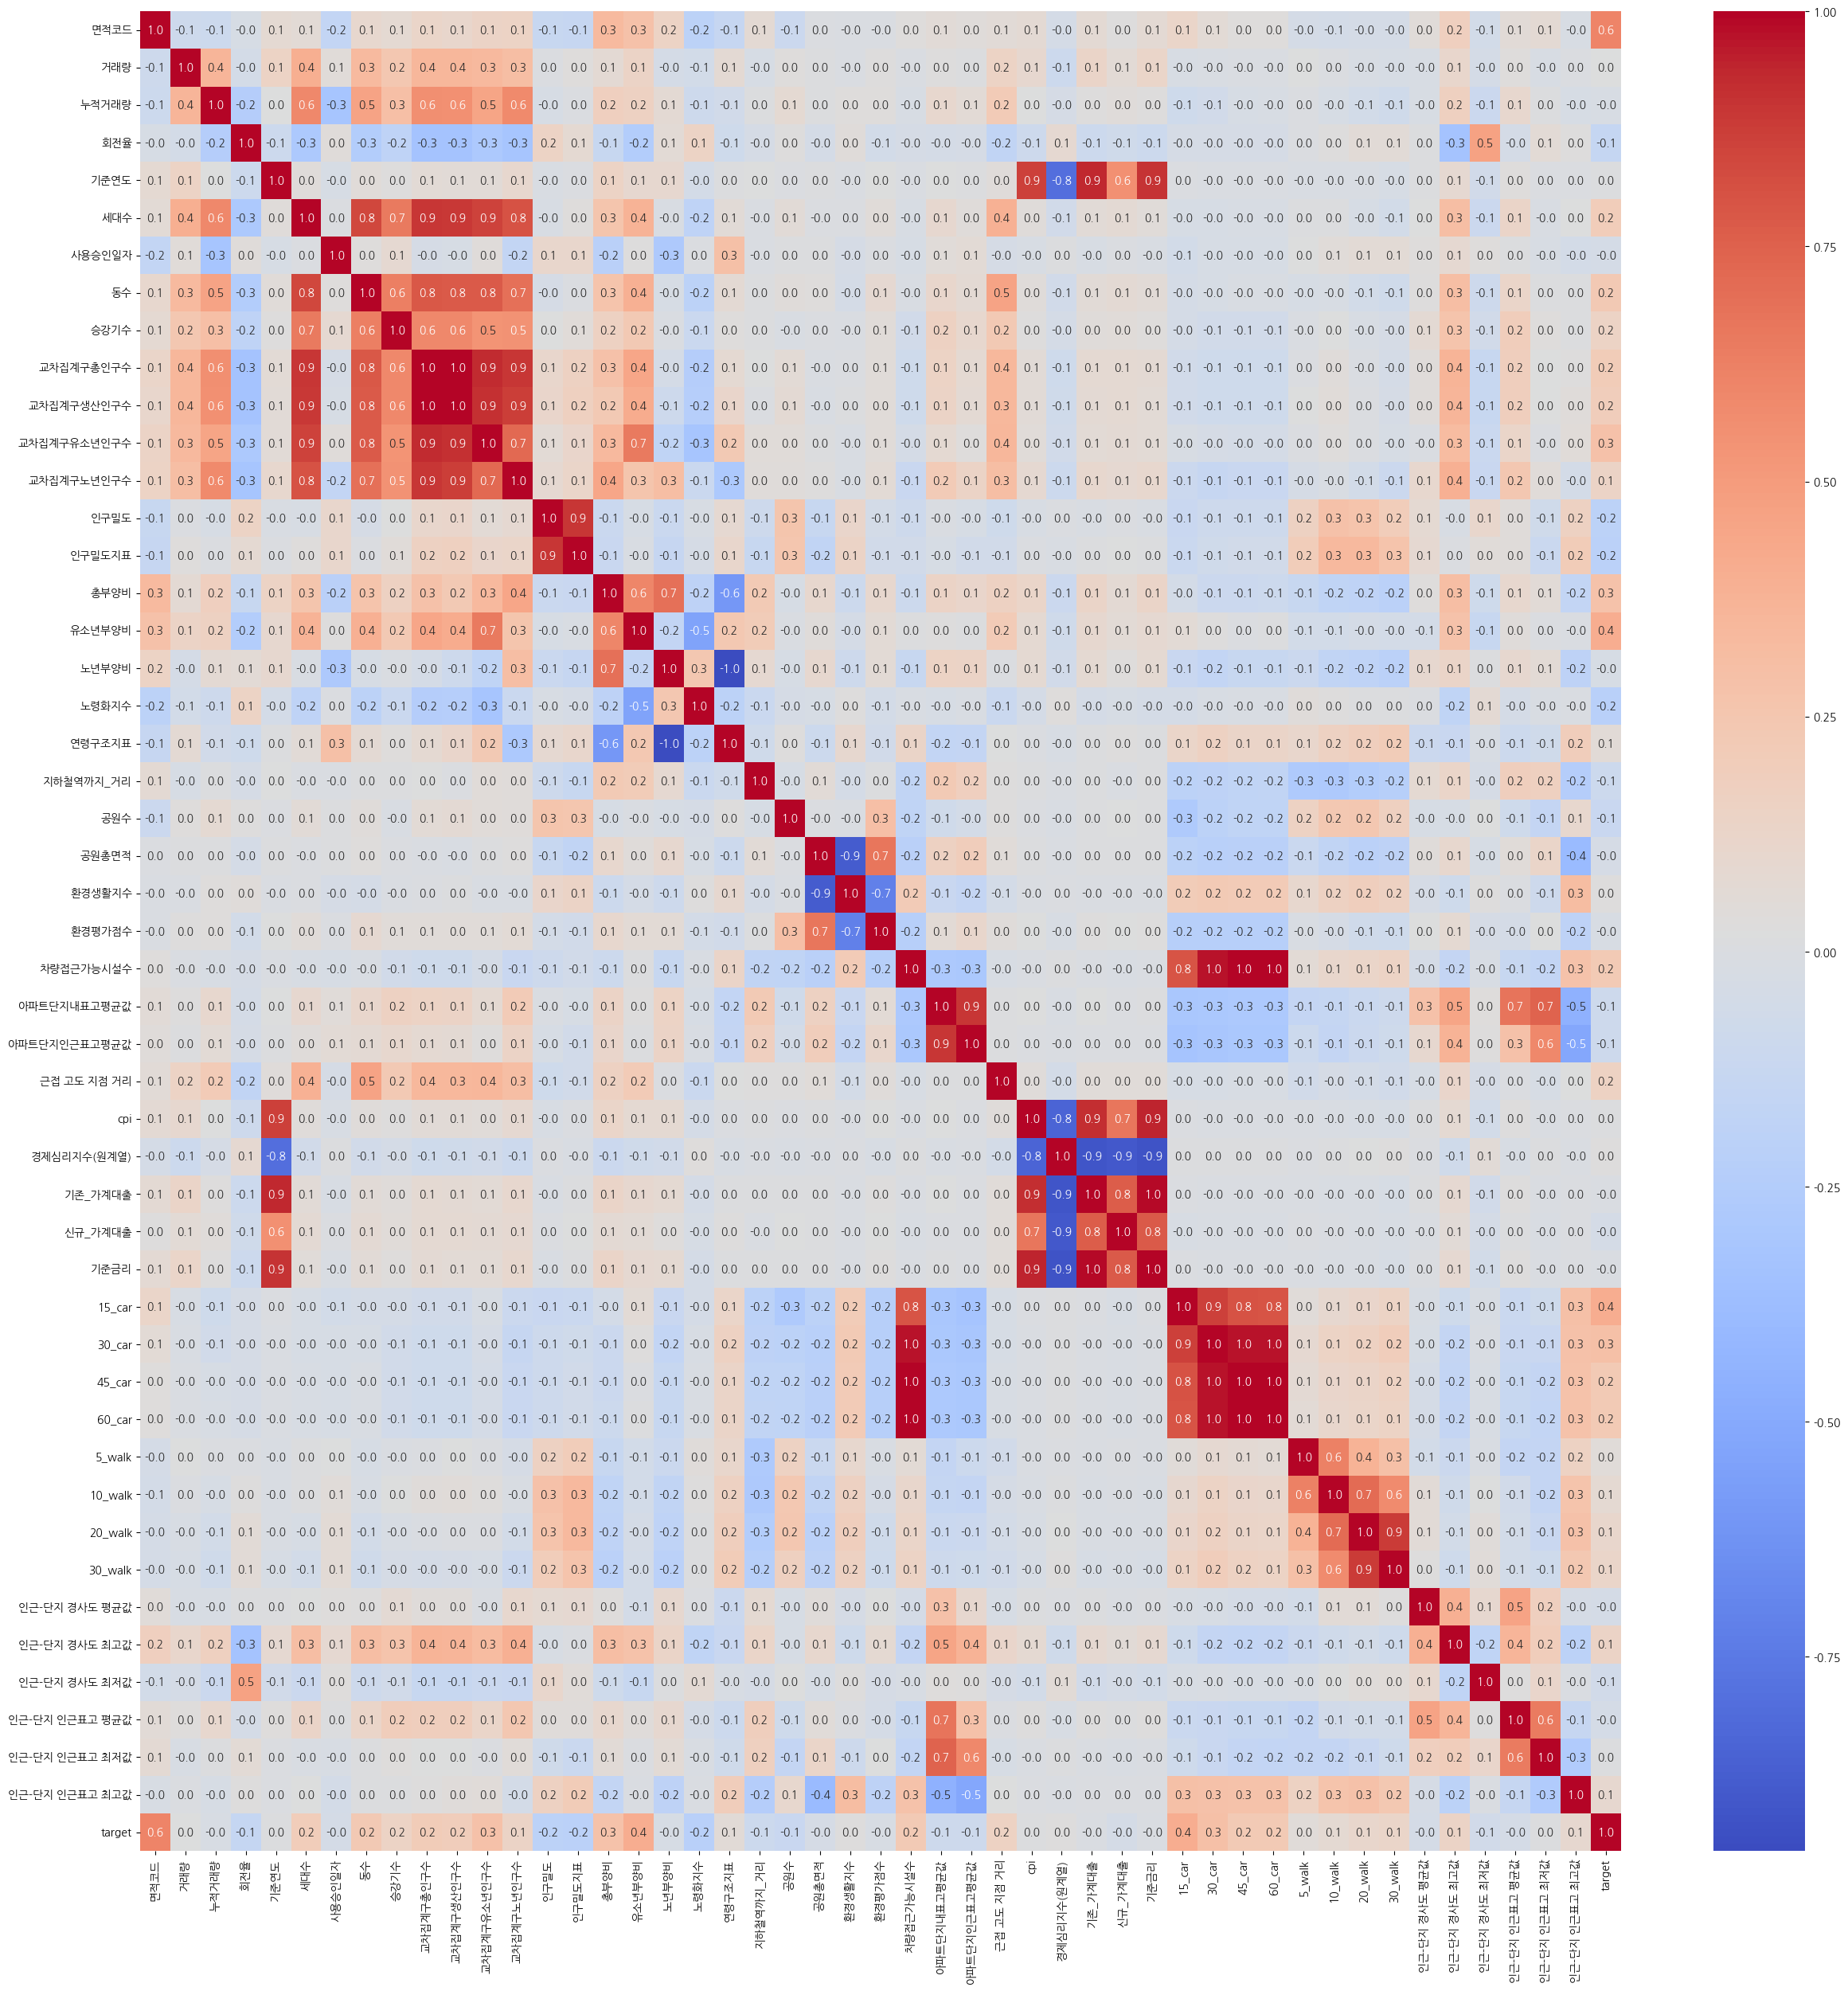

In [22]:
plt.figure(figsize=(30,30))
sns.heatmap(df_trd.loc[:,df_trd.select_dtypes(include=['int64','float64']).columns].corr(),annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

In [23]:
df_trd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29335 entries, 115 to 385487
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   면적코드            29335 non-null  int64  
 1   거래량             29335 non-null  int64  
 2   누적거래량           29335 non-null  int64  
 3   회전율             29335 non-null  float64
 4   기준연도            29335 non-null  int64  
 5   세대수             29250 non-null  float64
 6   사용승인일자          29195 non-null  float64
 7   동수              28356 non-null  float64
 8   승강기수            28356 non-null  float64
 9   교차집계구총인구수       29316 non-null  float64
 10  교차집계구생산인구수      29316 non-null  float64
 11  교차집계구유소년인구수     29316 non-null  float64
 12  교차집계구노년인구수      29316 non-null  float64
 13  인구밀도            29316 non-null  float64
 14  인구밀도지표          29320 non-null  float64
 15  총부양비            29320 non-null  float64
 16  유소년부양비          29320 non-null  float64
 17  노년부양비           29320 non-nu

In [24]:
df_trd = pd.get_dummies(df_trd, columns=['호선'], prefix='호선').copy()
target_feature = 'target'

# target feature를 맨 뒤로 이동
columns = [col for col in df_trd.columns if col != target_feature] + [target_feature]
df_trd = df_trd[columns]

In [25]:
df_trd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29335 entries, 115 to 385487
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   면적코드            29335 non-null  int64  
 1   거래량             29335 non-null  int64  
 2   누적거래량           29335 non-null  int64  
 3   회전율             29335 non-null  float64
 4   기준연도            29335 non-null  int64  
 5   세대수             29250 non-null  float64
 6   사용승인일자          29195 non-null  float64
 7   동수              28356 non-null  float64
 8   승강기수            28356 non-null  float64
 9   교차집계구총인구수       29316 non-null  float64
 10  교차집계구생산인구수      29316 non-null  float64
 11  교차집계구유소년인구수     29316 non-null  float64
 12  교차집계구노년인구수      29316 non-null  float64
 13  인구밀도            29316 non-null  float64
 14  인구밀도지표          29320 non-null  float64
 15  총부양비            29320 non-null  float64
 16  유소년부양비          29320 non-null  float64
 17  노년부양비           29320 non-nu

In [26]:
df= df_trd.copy()

In [27]:
import os
import sys
sys.path.append("../../../../../../mnt/workspace/LightGBM/python-package")
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42, stratify=df.loc[:,'자치구명']) # train, test set 분리
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=X_train['자치구명']) # train, validation set 분리

X_tr.drop(columns='자치구명',inplace=True) # 자치구명 제거
X_val.drop(columns='자치구명',inplace=True) # 자치구명 제거


# 모델 학습
# XGBoost 분류기 초기화
xgb_model= XGBRegressor(
                    tree_method= 'hist',
                    device='cuda',
                    n_estimators= 4000,
                    random_state= 42,
                    enable_categorical= True,
                    early_stopping_rounds= 200
                )

xgb_model.fit(X_tr, Y_tr, eval_set=[(X_val, Y_val)], verbose= False)

# 기본 성능 평가
baseline_score = mean_squared_error(Y_test, xgb_model.predict(X_test.drop(columns='자치구명')), squared=False)
print(f'Baseline Score: {baseline_score:.4f}')


# Permutation Importance 평가
perm_importance = permutation_importance(xgb_model, X_val, Y_val, n_repeats=20, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1)

# 변수 중요도 출력
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {X_tr.columns[i]}, Importance: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

Baseline Score: 241586632.5080


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [11:26:04] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:160: UserWarning: [11:26:04] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boost

Feature 면적코드, Importance: 422082287.8187 ± 10728860.0753
Feature 15_car, Importance: 323527837.2686 ± 14613532.9983
Feature 사용승인일자, Importance: 77104391.1129 ± 4982055.7116
Feature 승강기수, Importance: 76311787.6535 ± 10036444.1342
Feature 차량접근가능시설수, Importance: 74944899.0616 ± 3596281.0744
Feature 유소년부양비, Importance: 56543172.4414 ± 3272890.5506
Feature 30_car, Importance: 53618306.3957 ± 1795372.5201
Feature 30_walk, Importance: 45371814.0567 ± 1490752.1199
Feature 인구밀도, Importance: 40839937.9575 ± 2637842.5038
Feature 45_car, Importance: 37106247.4657 ± 2405581.7663
Feature 호선_분당선, Importance: 35898855.9100 ± 2601279.2318
Feature 인근-단지 인근표고 최저값, Importance: 28929396.7689 ± 3376929.5657
Feature 세대수, Importance: 26739145.5222 ± 1397621.9776
Feature 동수, Importance: 25927809.7668 ± 1487328.7622
Feature 지하철역까지_거리, Importance: 25305891.9229 ± 1966999.6729
Feature 교차집계구유소년인구수, Importance: 24770380.6374 ± 1350389.3402
Feature 호선_3호선, Importance: 22247982.8173 ± 1313991.5640
Feature 근접 고도 지점 거리

In [41]:
df.drop(columns='기준연도', inplace=True)

In [42]:
import os
import sys
sys.path.append("../../../../../../mnt/workspace/LightGBM/python-package")
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42, stratify=df.loc[:,'자치구명']) # train, test set 분리
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=X_train['자치구명']) # train, validation set 분리

X_tr.drop(columns='자치구명',inplace=True) # 자치구명 제거
X_val.drop(columns='자치구명',inplace=True) # 자치구명 제거


# 모델 학습
# XGBoost 분류기 초기화
xgb_model= XGBRegressor(
                    tree_method= 'hist',
                    device='cuda',
                    n_estimators= 4000,
                    random_state= 42,
                    enable_categorical= True,
                    early_stopping_rounds= 200
                )

xgb_model.fit(X_tr, Y_tr, eval_set=[(X_val, Y_val)], verbose= False)

# 기본 성능 평가
baseline_score = mean_squared_error(Y_test, xgb_model.predict(X_test.drop(columns='자치구명')), squared=False)
print(f'Baseline Score: {baseline_score:.4f}')


# Permutation Importance 평가
perm_importance = permutation_importance(xgb_model, X_val, Y_val, n_repeats=20, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1)

# 변수 중요도 출력
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {X_tr.columns[i]}, Importance: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

Baseline Score: 240894172.1702
Feature 면적코드, Importance: 426101613.5495 ± 11163865.8857
Feature 15_car, Importance: 313211496.4455 ± 14611780.0547
Feature 사용승인일자, Importance: 83890016.1150 ± 5205405.6698
Feature 차량접근가능시설수, Importance: 81377265.9827 ± 4673312.5942
Feature 승강기수, Importance: 79028713.6612 ± 9627327.8791
Feature 30_car, Importance: 61393526.9512 ± 2413564.1521
Feature 유소년부양비, Importance: 61139489.4129 ± 3207618.5316
Feature 30_walk, Importance: 41453925.8725 ± 1669489.6514
Feature 인구밀도, Importance: 40920498.8915 ± 2499783.9152
Feature 호선_분당선, Importance: 33607408.0017 ± 2360135.5212
Feature 세대수, Importance: 31833813.1637 ± 1652750.1689
Feature 인근-단지 인근표고 최저값, Importance: 31773797.6311 ± 3761679.7541
Feature 동수, Importance: 26703573.1458 ± 1418927.3147
Feature 호선_3호선, Importance: 26265002.3002 ± 1519995.8407
Feature 지하철역까지_거리, Importance: 25001529.2058 ± 2359911.5431
Feature 45_car, Importance: 24101816.9186 ± 2076838.6793
Feature 교차집계구유소년인구수, Importance: 23182143.6966 ± 16

In [43]:
df.drop(columns='인구밀도지표', inplace=True)

In [44]:
import os
import sys
sys.path.append("../../../../../../mnt/workspace/LightGBM/python-package")
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42, stratify=df.loc[:,'자치구명']) # train, test set 분리
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=X_train['자치구명']) # train, validation set 분리

X_tr.drop(columns='자치구명',inplace=True) # 자치구명 제거
X_val.drop(columns='자치구명',inplace=True) # 자치구명 제거


# 모델 학습
# XGBoost 분류기 초기화
xgb_model= XGBRegressor(
                    tree_method= 'hist',
                    device='cuda',
                    n_estimators= 4000,
                    random_state= 42,
                    enable_categorical= True,
                    early_stopping_rounds= 200
                )

xgb_model.fit(X_tr, Y_tr, eval_set=[(X_val, Y_val)], verbose= False)

# 기본 성능 평가
baseline_score = mean_squared_error(Y_test, xgb_model.predict(X_test.drop(columns='자치구명')), squared=False)
print(f'Baseline Score: {baseline_score:.4f}')


# Permutation Importance 평가
perm_importance = permutation_importance(xgb_model, X_val, Y_val, n_repeats=20, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1)

# 변수 중요도 출력
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {X_tr.columns[i]}, Importance: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

Baseline Score: 243176529.4427
Feature 면적코드, Importance: 423486748.3441 ± 11072056.7211
Feature 15_car, Importance: 316749795.8973 ± 14348592.4284
Feature 차량접근가능시설수, Importance: 101540281.6639 ± 4718897.7608
Feature 사용승인일자, Importance: 82736708.0117 ± 5061357.4225
Feature 승강기수, Importance: 79351659.7782 ± 9722700.8482
Feature 유소년부양비, Importance: 61922364.7411 ± 3208282.5294
Feature 30_car, Importance: 61539346.6912 ± 2698745.6680
Feature 30_walk, Importance: 40343368.4654 ± 1807605.2306
Feature 인구밀도, Importance: 40260756.2102 ± 2569467.7839
Feature 호선_분당선, Importance: 33055219.7025 ± 2189384.1861
Feature 인근-단지 인근표고 최저값, Importance: 31350175.7849 ± 3723658.8447
Feature 세대수, Importance: 29683905.5244 ± 1625386.6834
Feature 동수, Importance: 28140286.9244 ± 1308384.6119
Feature 호선_3호선, Importance: 25774918.7004 ± 1400946.0382
Feature 지하철역까지_거리, Importance: 25453428.4719 ± 2300918.3391
Feature 45_car, Importance: 25237765.4105 ± 2358683.3713
Feature 교차집계구유소년인구수, Importance: 22393471.4819 ± 1

In [45]:
df.drop(columns='신규_가계대출', inplace=True)

In [46]:
import os
import sys
sys.path.append("../../../../../../mnt/workspace/LightGBM/python-package")
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42, stratify=df.loc[:,'자치구명']) # train, test set 분리
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=X_train['자치구명']) # train, validation set 분리

X_tr.drop(columns='자치구명',inplace=True) # 자치구명 제거
X_val.drop(columns='자치구명',inplace=True) # 자치구명 제거


# 모델 학습
# XGBoost 분류기 초기화
xgb_model= XGBRegressor(
                    tree_method= 'hist',
                    device='cuda',
                    n_estimators= 4000,
                    random_state= 42,
                    enable_categorical= True,
                    early_stopping_rounds= 200
                )

xgb_model.fit(X_tr, Y_tr, eval_set=[(X_val, Y_val)], verbose= False)

# 기본 성능 평가
baseline_score = mean_squared_error(Y_test, xgb_model.predict(X_test.drop(columns='자치구명')), squared=False)
print(f'Baseline Score: {baseline_score:.4f}')


# Permutation Importance 평가
perm_importance = permutation_importance(xgb_model, X_val, Y_val, n_repeats=20, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1)

# 변수 중요도 출력
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {X_tr.columns[i]}, Importance: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

Baseline Score: 242150497.6462
Feature 면적코드, Importance: 429993965.7191 ± 11368852.9371
Feature 15_car, Importance: 310554687.9507 ± 14353689.8235
Feature 차량접근가능시설수, Importance: 112266455.3856 ± 4698577.8032
Feature 사용승인일자, Importance: 85521226.8661 ± 6813423.3463
Feature 승강기수, Importance: 79445502.5335 ± 10288272.2020
Feature 유소년부양비, Importance: 59861376.9046 ± 2659992.2242
Feature 30_car, Importance: 55422984.6321 ± 2199265.0470
Feature 30_walk, Importance: 45679319.9355 ± 1818383.9469
Feature 인구밀도, Importance: 41366546.2445 ± 2685749.6765
Feature 호선_분당선, Importance: 33393034.5046 ± 2399478.5695
Feature 동수, Importance: 28185776.1306 ± 1652136.4677
Feature 인근-단지 인근표고 최저값, Importance: 28181674.4210 ± 3759519.7399
Feature 세대수, Importance: 25782924.4615 ± 1531052.3629
Feature 교차집계구유소년인구수, Importance: 25624998.5557 ± 1829999.4715
Feature 지하철역까지_거리, Importance: 23199512.8273 ± 1931341.7714
Feature 5_walk, Importance: 20765317.2922 ± 2463804.6531
Feature 호선_3호선, Importance: 20754600.2053 ± 

In [47]:
df.drop(columns='기준금리', inplace=True)

In [48]:
import os
import sys
sys.path.append("../../../../../../mnt/workspace/LightGBM/python-package")
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42, stratify=df.loc[:,'자치구명']) # train, test set 분리
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=X_train['자치구명']) # train, validation set 분리

X_tr.drop(columns='자치구명',inplace=True) # 자치구명 제거
X_val.drop(columns='자치구명',inplace=True) # 자치구명 제거


# 모델 학습
# XGBoost 분류기 초기화
xgb_model= XGBRegressor(
                    tree_method= 'hist',
                    device='cuda',
                    n_estimators= 4000,
                    random_state= 42,
                    enable_categorical= True,
                    early_stopping_rounds= 200
                )

xgb_model.fit(X_tr, Y_tr, eval_set=[(X_val, Y_val)], verbose= False)

# 기본 성능 평가
baseline_score = mean_squared_error(Y_test, xgb_model.predict(X_test.drop(columns='자치구명')), squared=False)
print(f'Baseline Score: {baseline_score:.4f}')


# Permutation Importance 평가
perm_importance = permutation_importance(xgb_model, X_val, Y_val, n_repeats=20, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1)

# 변수 중요도 출력
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {X_tr.columns[i]}, Importance: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

Baseline Score: 242150497.6462
Feature 면적코드, Importance: 429993965.7191 ± 11368852.9371
Feature 15_car, Importance: 310554687.9507 ± 14353689.8235
Feature 차량접근가능시설수, Importance: 112266455.3856 ± 4698577.8032
Feature 사용승인일자, Importance: 85521226.8661 ± 6813423.3463
Feature 승강기수, Importance: 79445502.5335 ± 10288272.2020
Feature 유소년부양비, Importance: 59861376.9046 ± 2659992.2242
Feature 30_car, Importance: 55422984.6321 ± 2199265.0470
Feature 30_walk, Importance: 45679319.9355 ± 1818383.9469
Feature 인구밀도, Importance: 41366546.2445 ± 2685749.6765
Feature 호선_분당선, Importance: 33393034.5046 ± 2399478.5695
Feature 동수, Importance: 28185776.1306 ± 1652136.4677
Feature 인근-단지 인근표고 최저값, Importance: 28181674.4210 ± 3759519.7399
Feature 세대수, Importance: 25782924.4615 ± 1531052.3629
Feature 교차집계구유소년인구수, Importance: 25624998.5557 ± 1829999.4715
Feature 지하철역까지_거리, Importance: 23199512.8273 ± 1931341.7714
Feature 5_walk, Importance: 20765317.2922 ± 2463804.6531
Feature 호선_3호선, Importance: 20754600.2053 ± 

In [49]:
df.drop(columns='인근-단지 경사도 최저값', inplace=True)

In [50]:
import os
import sys
sys.path.append("../../../../../../mnt/workspace/LightGBM/python-package")
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42, stratify=df.loc[:,'자치구명']) # train, test set 분리
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=X_train['자치구명']) # train, validation set 분리

X_tr.drop(columns='자치구명',inplace=True) # 자치구명 제거
X_val.drop(columns='자치구명',inplace=True) # 자치구명 제거


# 모델 학습
# XGBoost 분류기 초기화
xgb_model= XGBRegressor(
                    tree_method= 'hist',
                    device='cuda',
                    n_estimators= 4000,
                    random_state= 42,
                    enable_categorical= True,
                    early_stopping_rounds= 200
                )

xgb_model.fit(X_tr, Y_tr, eval_set=[(X_val, Y_val)], verbose= False)

# 기본 성능 평가
baseline_score = mean_squared_error(Y_test, xgb_model.predict(X_test.drop(columns='자치구명')), squared=False)
print(f'Baseline Score: {baseline_score:.4f}')


# Permutation Importance 평가
perm_importance = permutation_importance(xgb_model, X_val, Y_val, n_repeats=20, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1)

# 변수 중요도 출력
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"Feature {X_tr.columns[i]}, Importance: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

Baseline Score: 245219074.4770
Feature 면적코드, Importance: 426977059.5562 ± 11230938.3371
Feature 15_car, Importance: 321403001.9273 ± 14097776.0462
Feature 차량접근가능시설수, Importance: 194223614.9618 ± 5627342.1997
Feature 사용승인일자, Importance: 83386796.3933 ± 6766584.7727
Feature 승강기수, Importance: 82169178.7452 ± 10351813.1501
Feature 30_car, Importance: 66620666.6483 ± 2112212.8888
Feature 유소년부양비, Importance: 63516979.0455 ± 3354490.6516
Feature 45_car, Importance: 49951710.2939 ± 1154693.6592
Feature 30_walk, Importance: 42747420.9103 ± 2215156.7673
Feature 인구밀도, Importance: 41333230.2565 ± 2738912.4922
Feature 인근-단지 인근표고 최저값, Importance: 33723590.6902 ± 3821178.6447
Feature 호선_분당선, Importance: 32442533.6473 ± 2571234.7261
Feature 동수, Importance: 29570745.3584 ± 1565221.0308
Feature 세대수, Importance: 28780083.6620 ± 1659224.7709
Feature 교차집계구유소년인구수, Importance: 24675151.1812 ± 1740596.4752
Feature 지하철역까지_거리, Importance: 21437081.5297 ± 1940071.5981
Feature 호선_3호선, Importance: 19998434.0214 ± 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29335 entries, 115 to 385487
Data columns (total 64 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   면적코드            29335 non-null  int64  
 1   누적거래량           29335 non-null  int64  
 2   회전율             29335 non-null  float64
 3   세대수             29250 non-null  float64
 4   사용승인일자          29195 non-null  float64
 5   동수              28356 non-null  float64
 6   승강기수            28356 non-null  float64
 7   교차집계구총인구수       29316 non-null  float64
 8   교차집계구생산인구수      29316 non-null  float64
 9   교차집계구유소년인구수     29316 non-null  float64
 10  교차집계구노년인구수      29316 non-null  float64
 11  인구밀도            29316 non-null  float64
 12  총부양비            29320 non-null  float64
 13  유소년부양비          29320 non-null  float64
 14  노년부양비           29320 non-null  float64
 15  노령화지수           29320 non-null  float64
 16  연령구조지표          29320 non-null  float64
 17  지하철역까지_거리       29335 non-nu

In [52]:
model= XGBRegressor(
                    tree_method= 'hist',
                    device='cuda',
                    n_estimators= 4000,
                    random_state= 42
                )


X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42, stratify=df.loc[:,'자치구명']) # train, test set 분리
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=X_train['자치구명']) # train, validation set 분리

X_tr.drop(columns='자치구명',inplace=True) # 자치구명 제거
X_val.drop(columns='자치구명',inplace=True) # 자치구명 제거

model.fit(X_tr, Y_tr, eval_set=[(X_tr, Y_tr),(X_val, Y_val)], eval_metric='rmse', early_stopping_rounds=200, verbose= False) # 모델 학습
print(mean_squared_error(Y_test, model.predict(X_test.drop(columns='자치구명')), squared=False)) # test set에 대한 rmse 출력

245219074.47696805


##### 부분의존도 plot

In [53]:
from sklearn.model_selection import train_test_split
import pandas as pd

model= XGBRegressor(
                    tree_method= 'hist',
                    device='cuda',
                    n_estimators= 4000,
                    random_state= 42
                )


X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42, stratify=df.loc[:,'자치구명']) # train, test set 분리
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42, stratify=X_train['자치구명']) # train, validation set 분리

X_tr.drop(columns='자치구명',inplace=True) # 자치구명 제거
X_val.drop(columns='자치구명',inplace=True) # 자치구명 제거


model.fit(X_tr, Y_tr, eval_set=[(X_tr, Y_tr),(X_val, Y_val)], eval_metric='rmse', early_stopping_rounds=300, verbose= False) # 모델 학습
y_pred = model.predict(X_test.drop(columns='자치구명'))

rmse = mean_squared_error(Y_test, model.predict(X_test.drop(columns='자치구명')), squared=False)
print(f'RMSE: {rmse:.2f}')

RMSE: 245219074.48


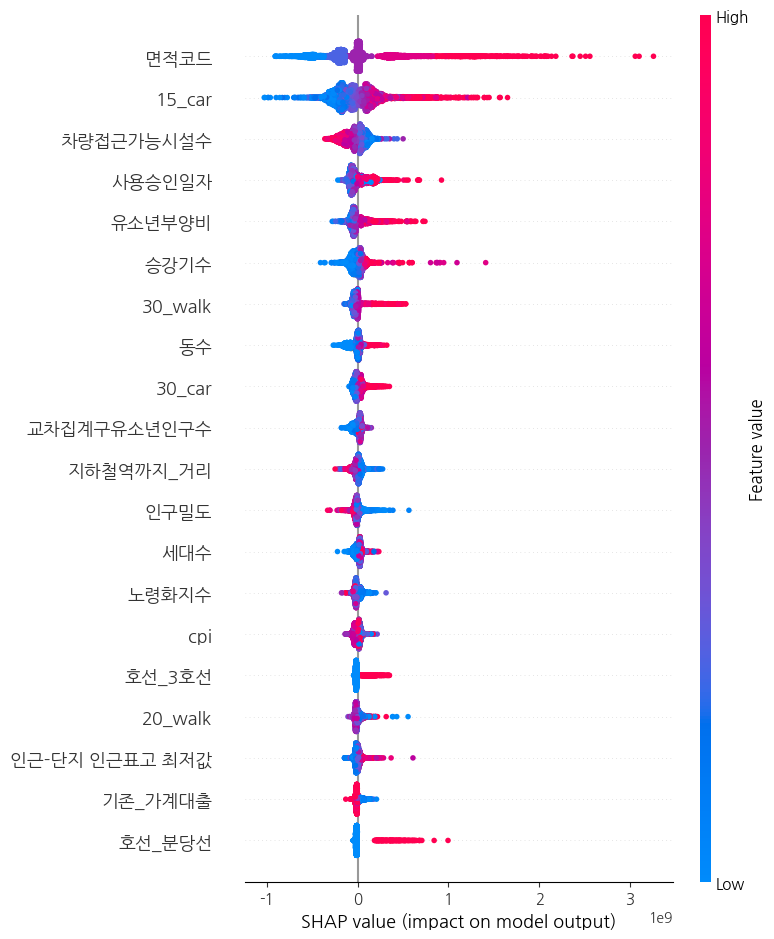

In [54]:
import shap



# SHAP 값 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test.drop(columns='자치구명'))
shap.summary_plot(shap_values, X_test.drop(columns='자치구명'))


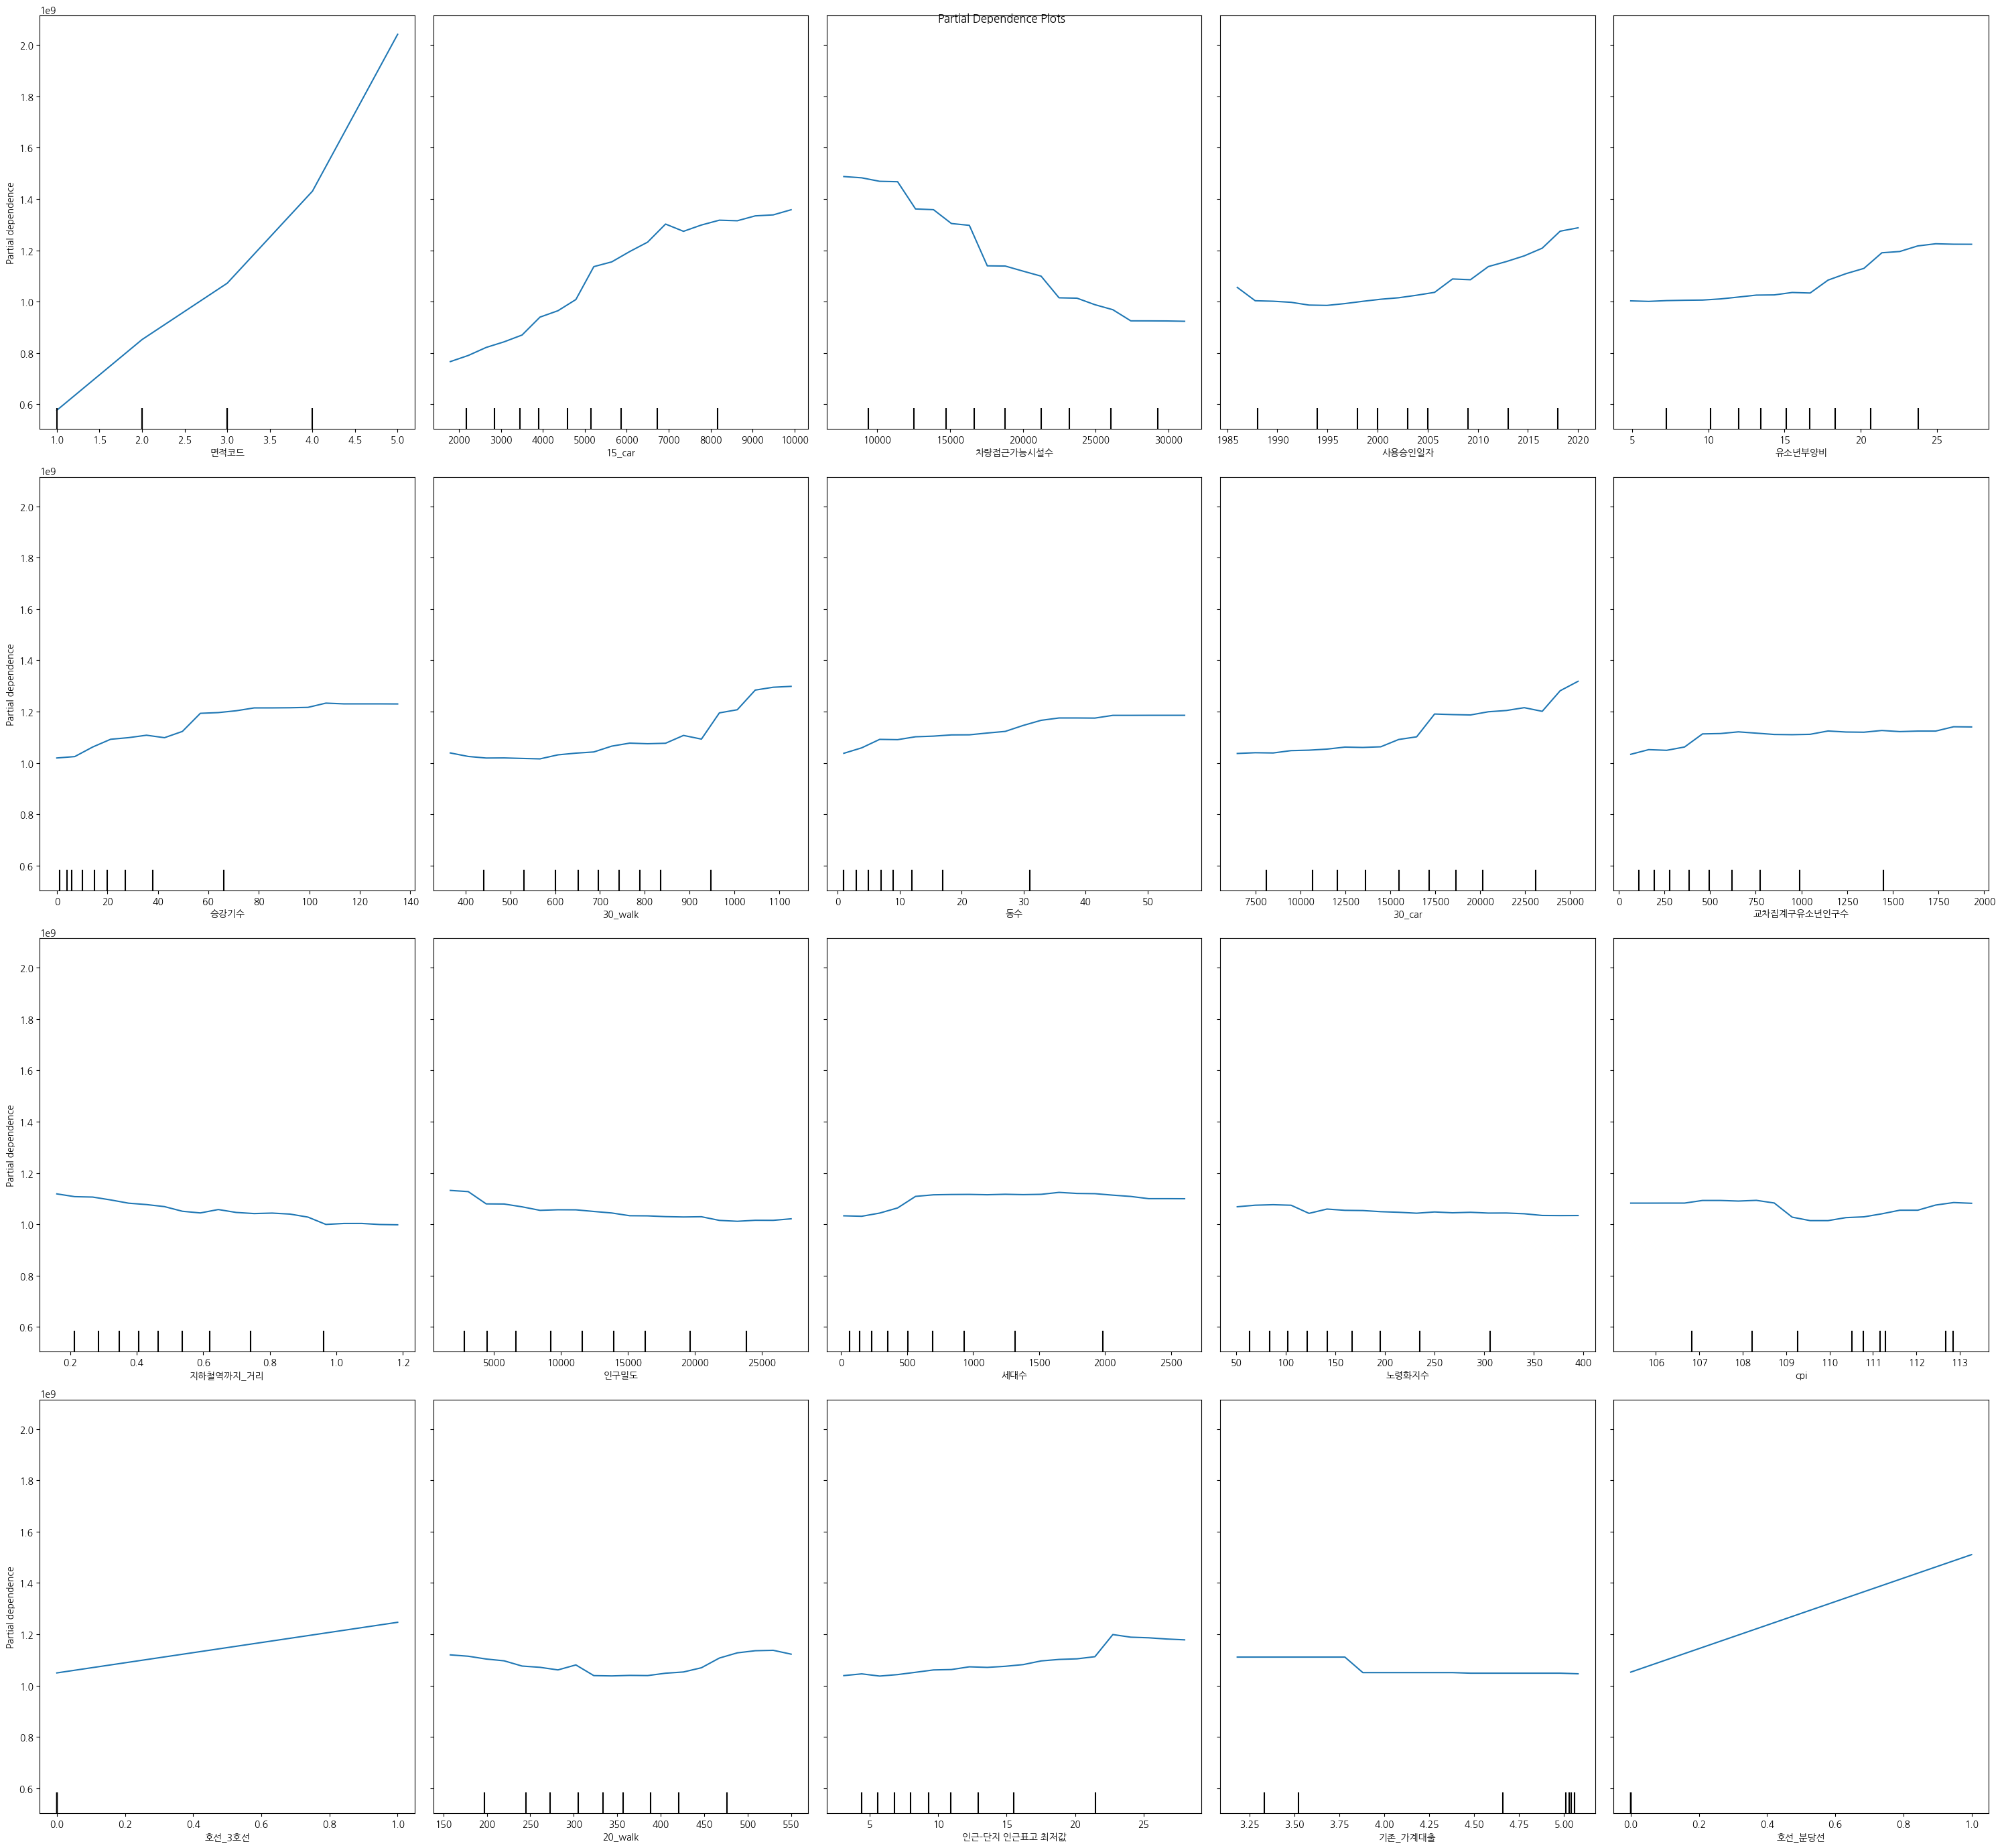

In [55]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


# SHAP 값 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test.drop(columns='자치구명'))

feature_importance = np.abs(shap_values).mean(0)
feature_importance_df = pd.DataFrame({
    'feature': X_test.drop(columns='자치구명').columns,
    'importance': feature_importance
})

top_20_features = feature_importance_df.sort_values('importance', ascending=False).head(20)
features = top_20_features['feature'].tolist()




# 부분 의존성 플롯 생성
fig, ax = plt.subplots(4, 5, figsize=(30, 28))
display = PartialDependenceDisplay.from_estimator(
    model,
    X_test.drop(columns='자치구명'),
    features,
    kind="average",
    subsample=1000,
    n_jobs=-1,
    grid_resolution=20,
    random_state=42,
    ax=ax
)
fig.suptitle("Partial Dependence Plots")
plt.tight_layout()
plt.show()


=== 종로구 분석 결과 ===
RMSE: 185410264.285


<Figure size 2000x1500 with 0 Axes>

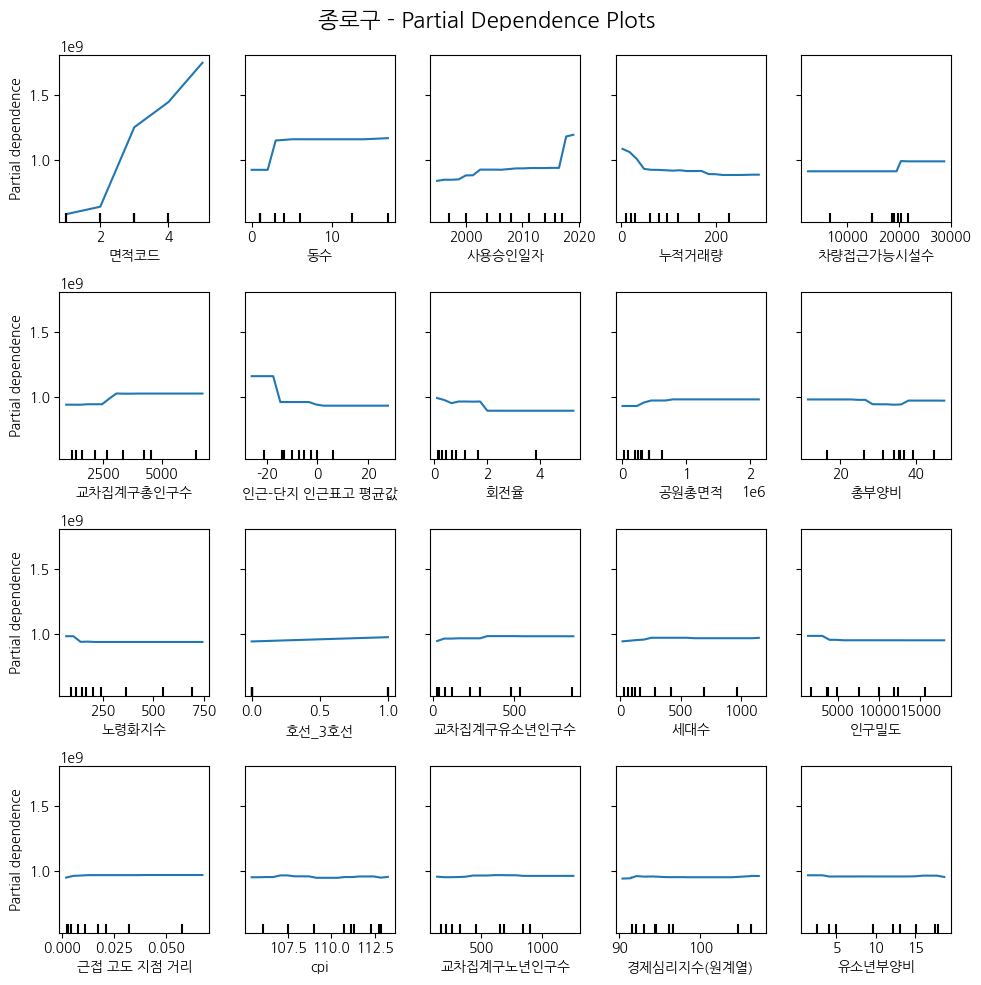


=== 중구 분석 결과 ===
RMSE: 165955733.580


<Figure size 2000x1500 with 0 Axes>

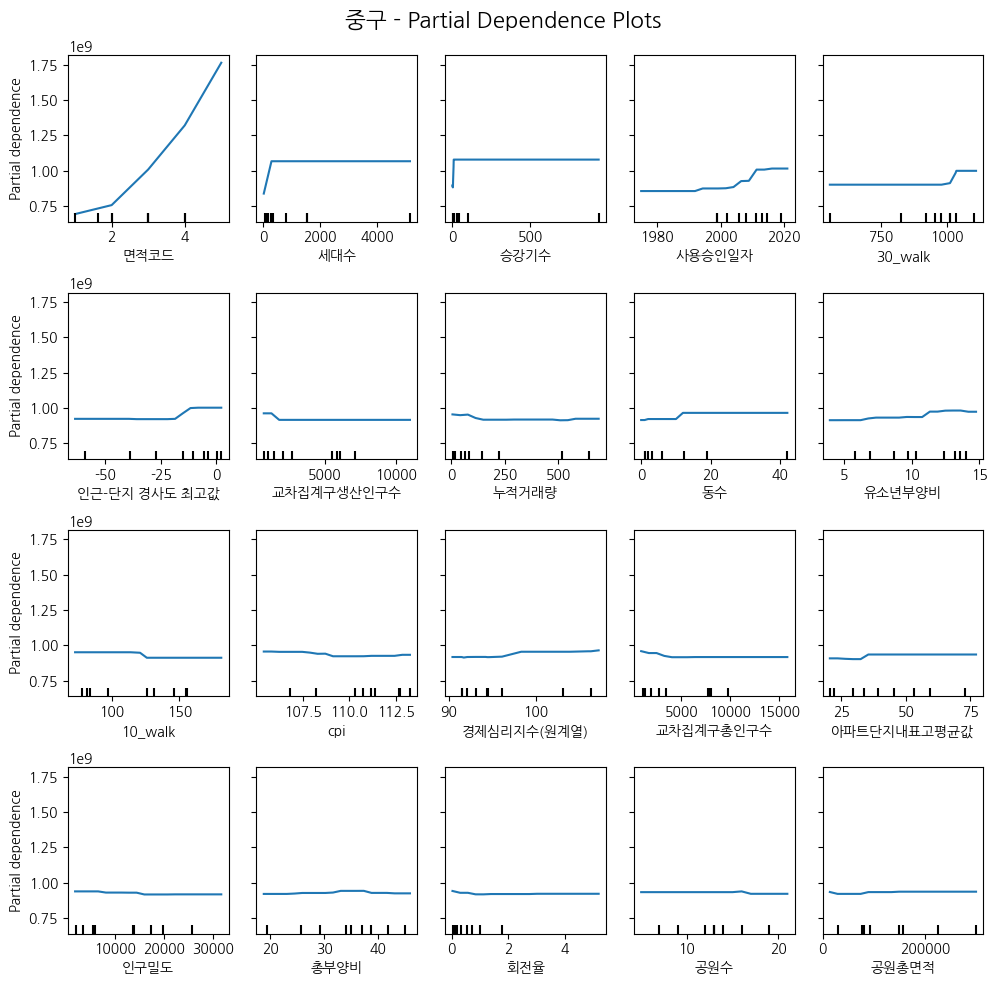


=== 용산구 분석 결과 ===
RMSE: 550788087.237


<Figure size 2000x1500 with 0 Axes>

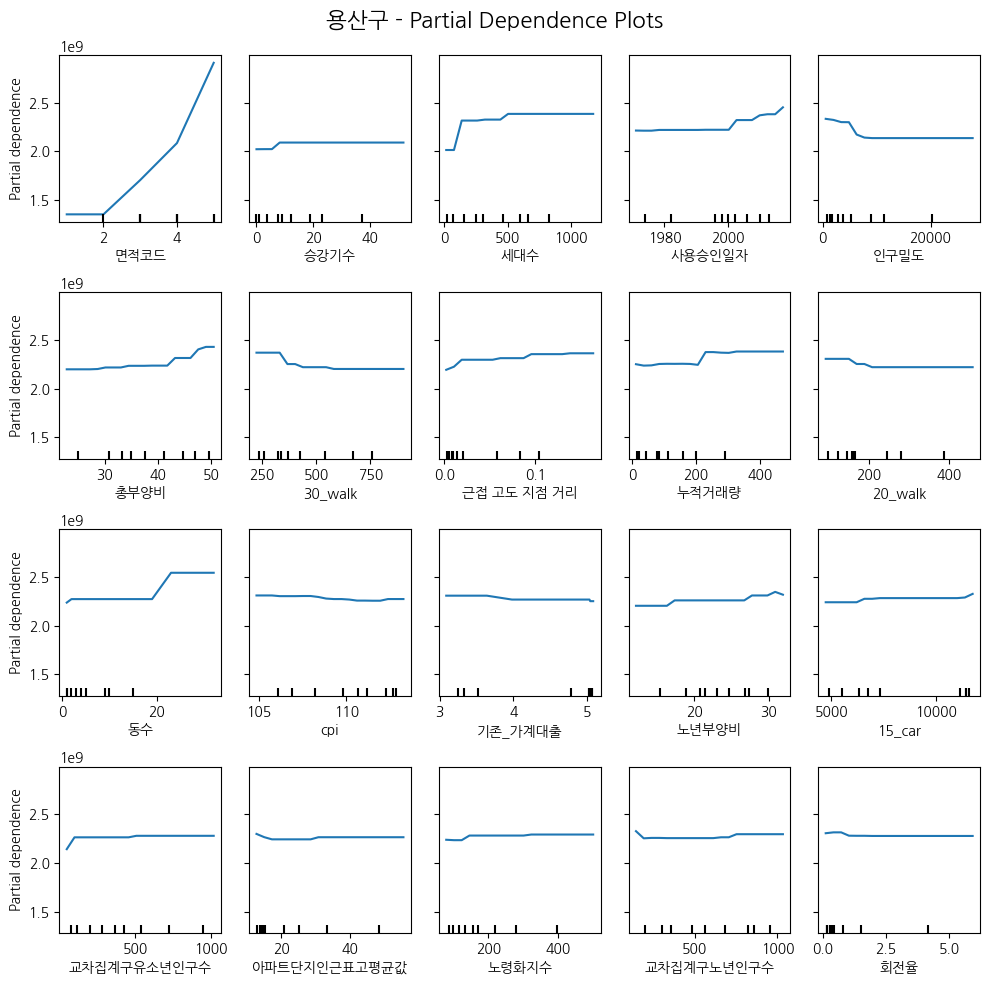


=== 성동구 분석 결과 ===
RMSE: 558369441.821


<Figure size 2000x1500 with 0 Axes>

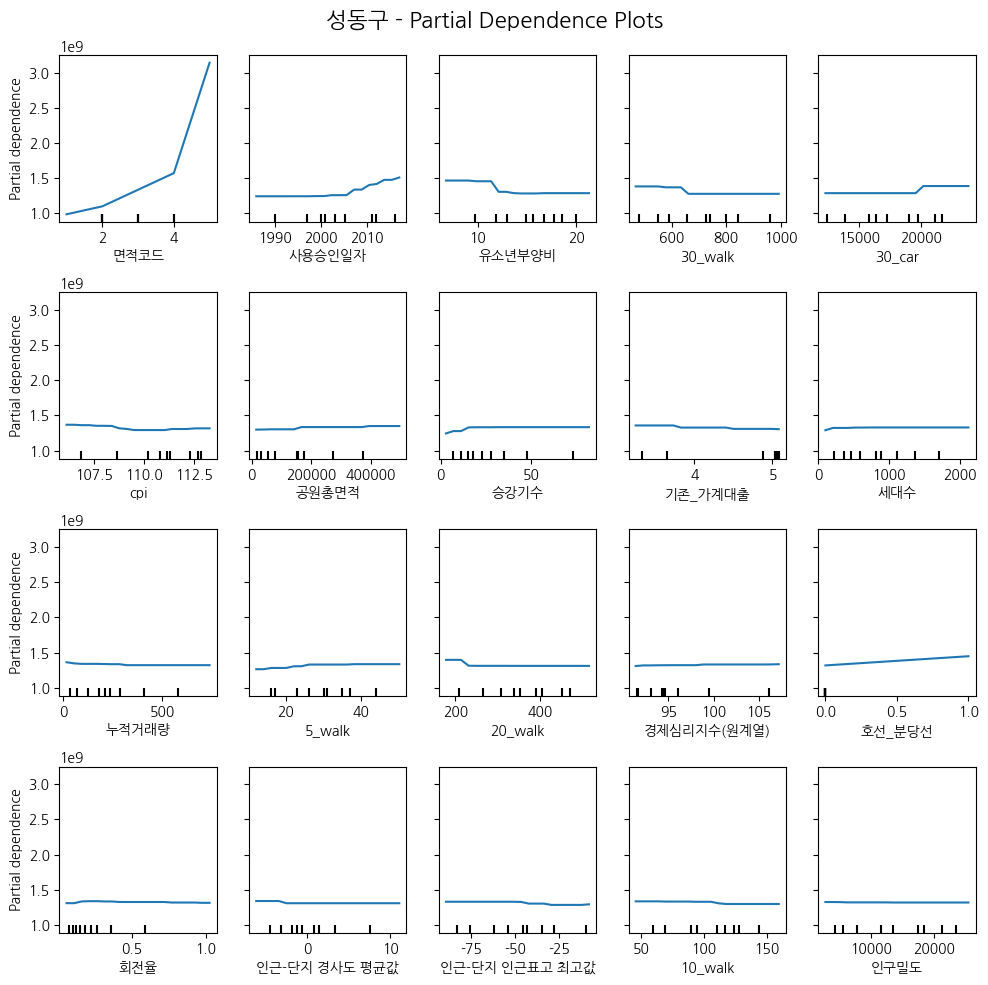


=== 광진구 분석 결과 ===
RMSE: 292940054.412


<Figure size 2000x1500 with 0 Axes>

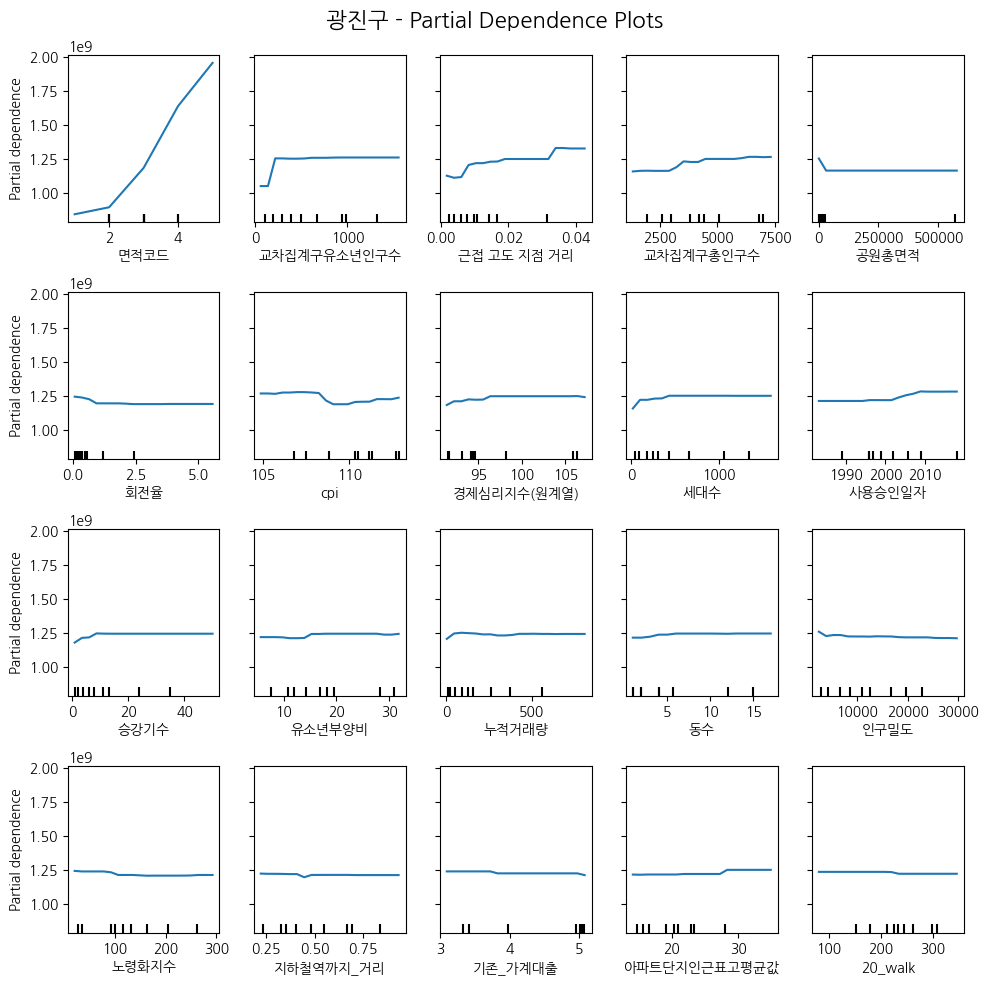


=== 동대문구 분석 결과 ===
RMSE: 75474805.672


<Figure size 2000x1500 with 0 Axes>

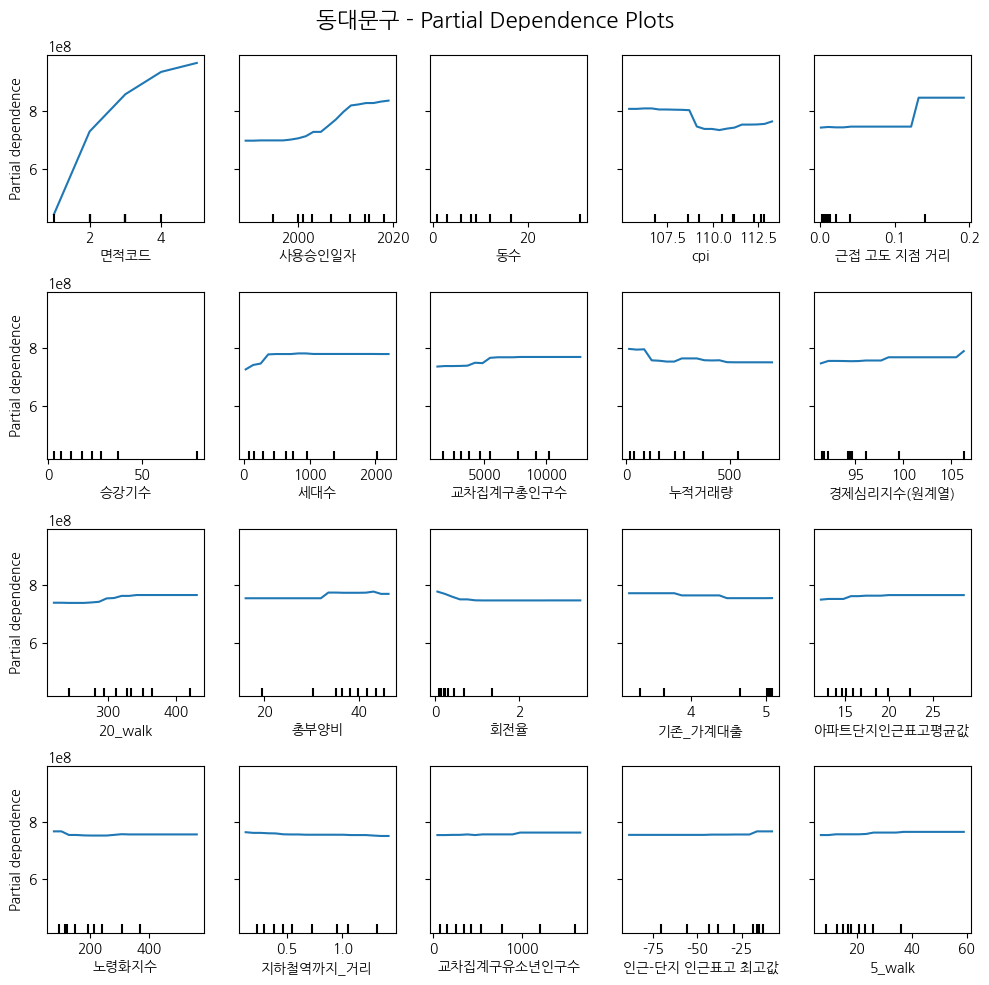


=== 중랑구 분석 결과 ===
RMSE: 93754989.961


<Figure size 2000x1500 with 0 Axes>

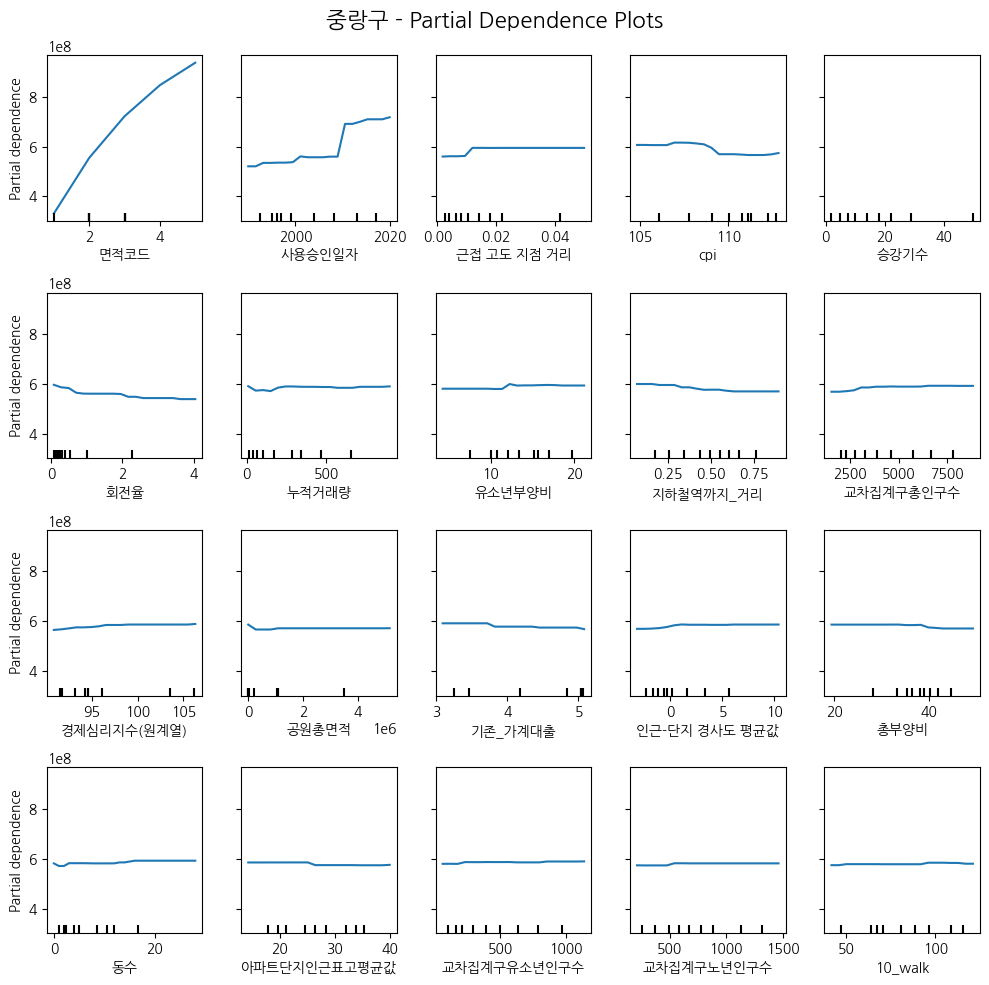


=== 성북구 분석 결과 ===
RMSE: 67869686.985


<Figure size 2000x1500 with 0 Axes>

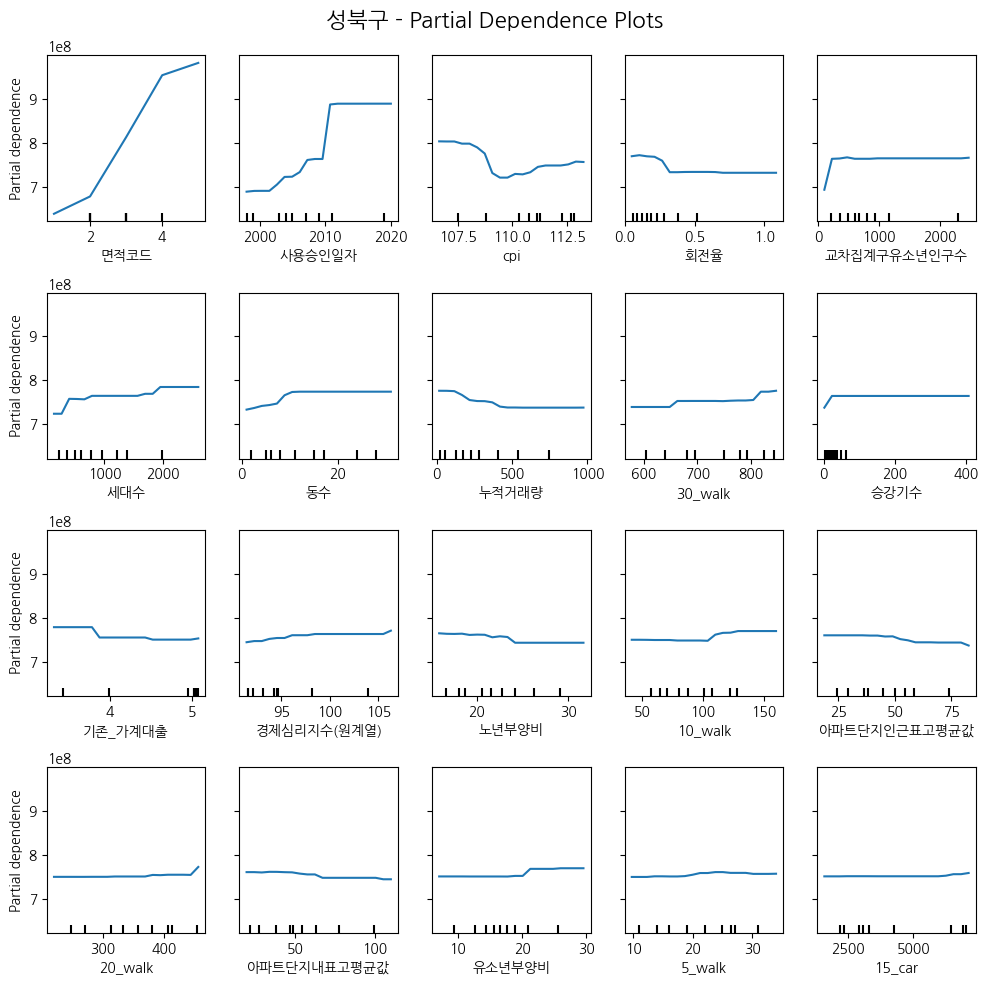


=== 강북구 분석 결과 ===
RMSE: 90188096.817


<Figure size 2000x1500 with 0 Axes>

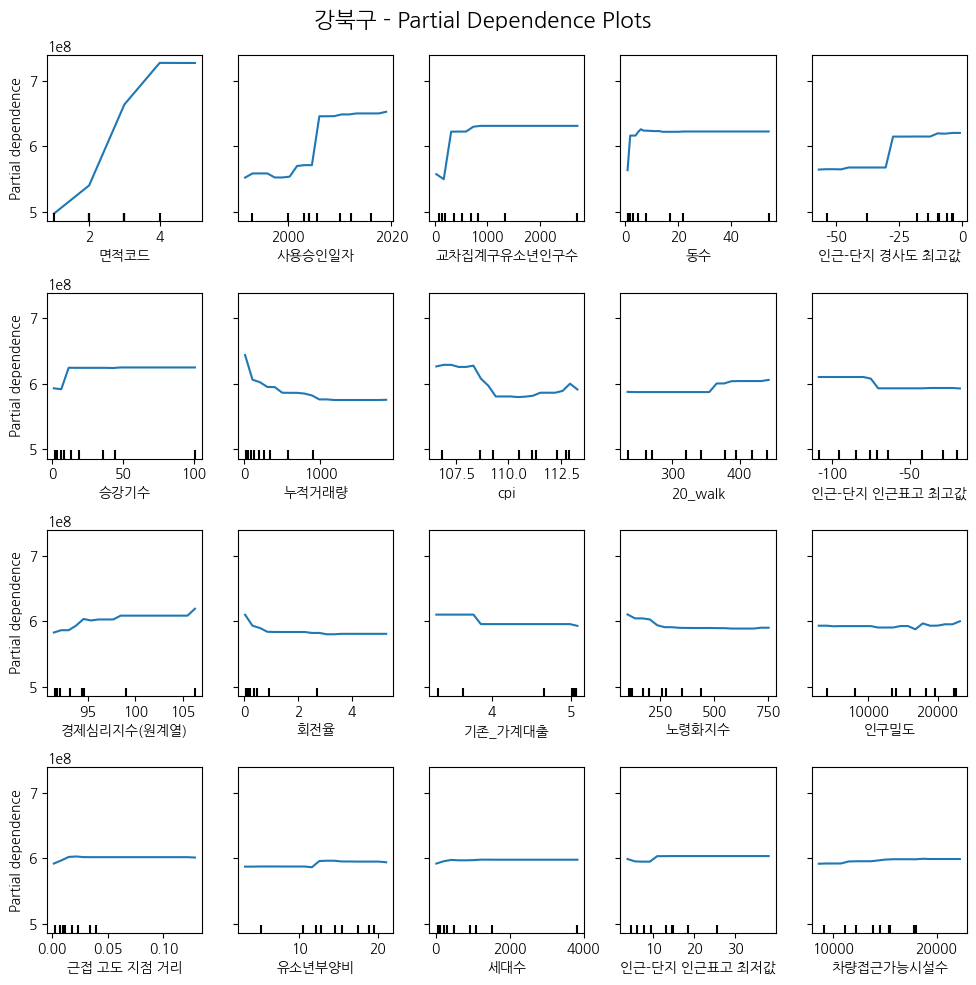


=== 도봉구 분석 결과 ===
RMSE: 92091864.884


<Figure size 2000x1500 with 0 Axes>

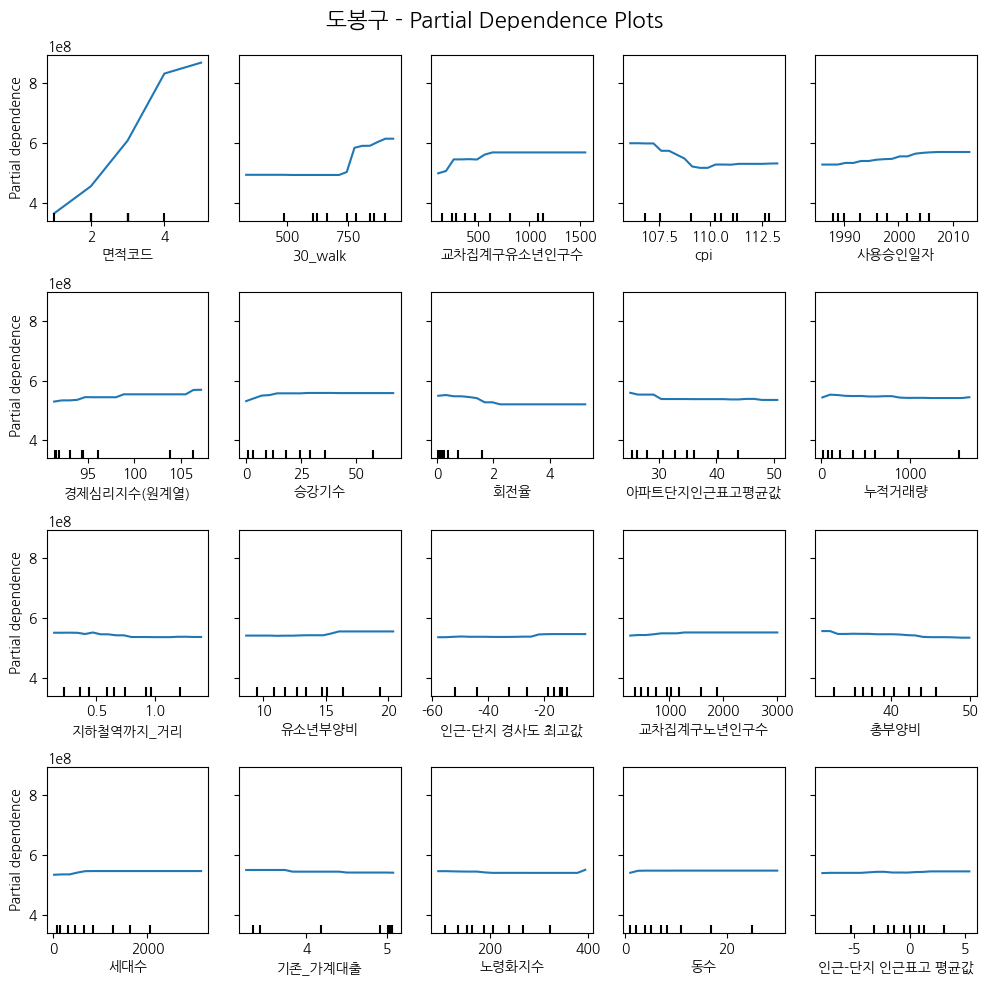


=== 노원구 분석 결과 ===
RMSE: 66947104.579


<Figure size 2000x1500 with 0 Axes>

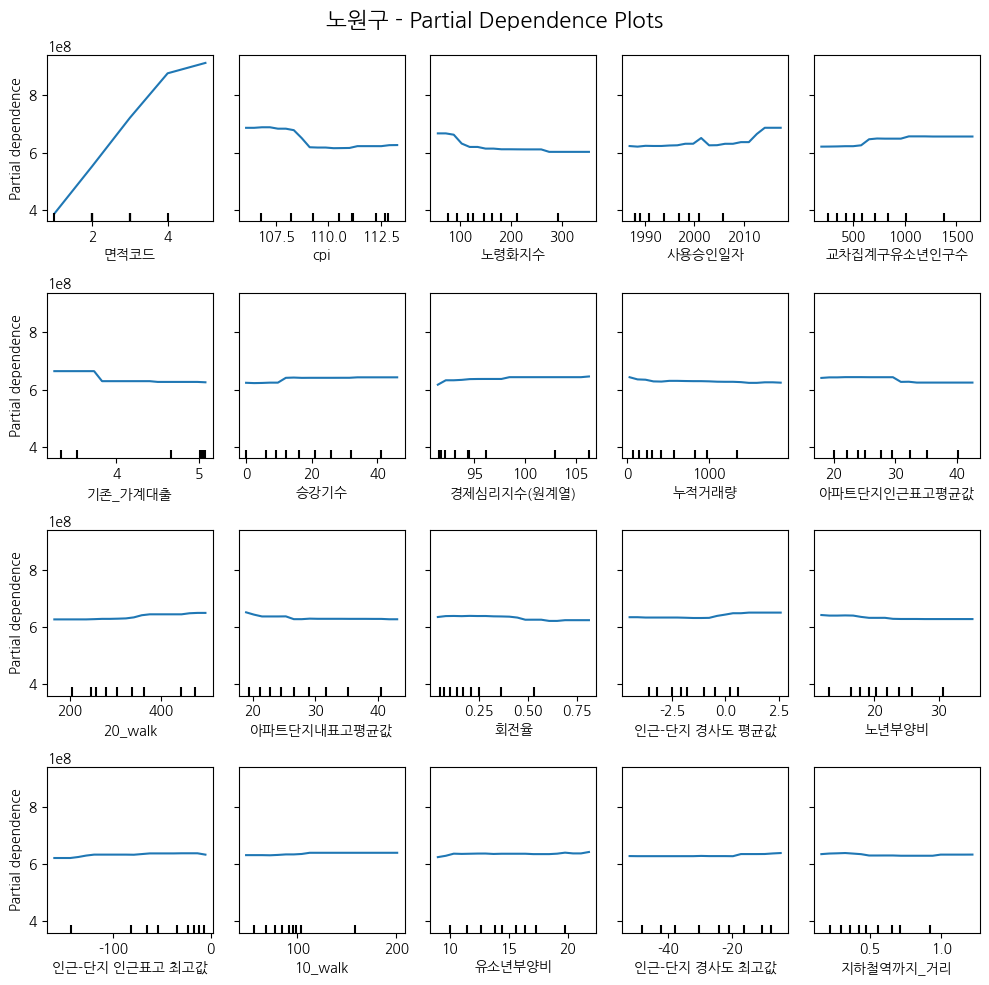


=== 은평구 분석 결과 ===
RMSE: 95370292.811


<Figure size 2000x1500 with 0 Axes>

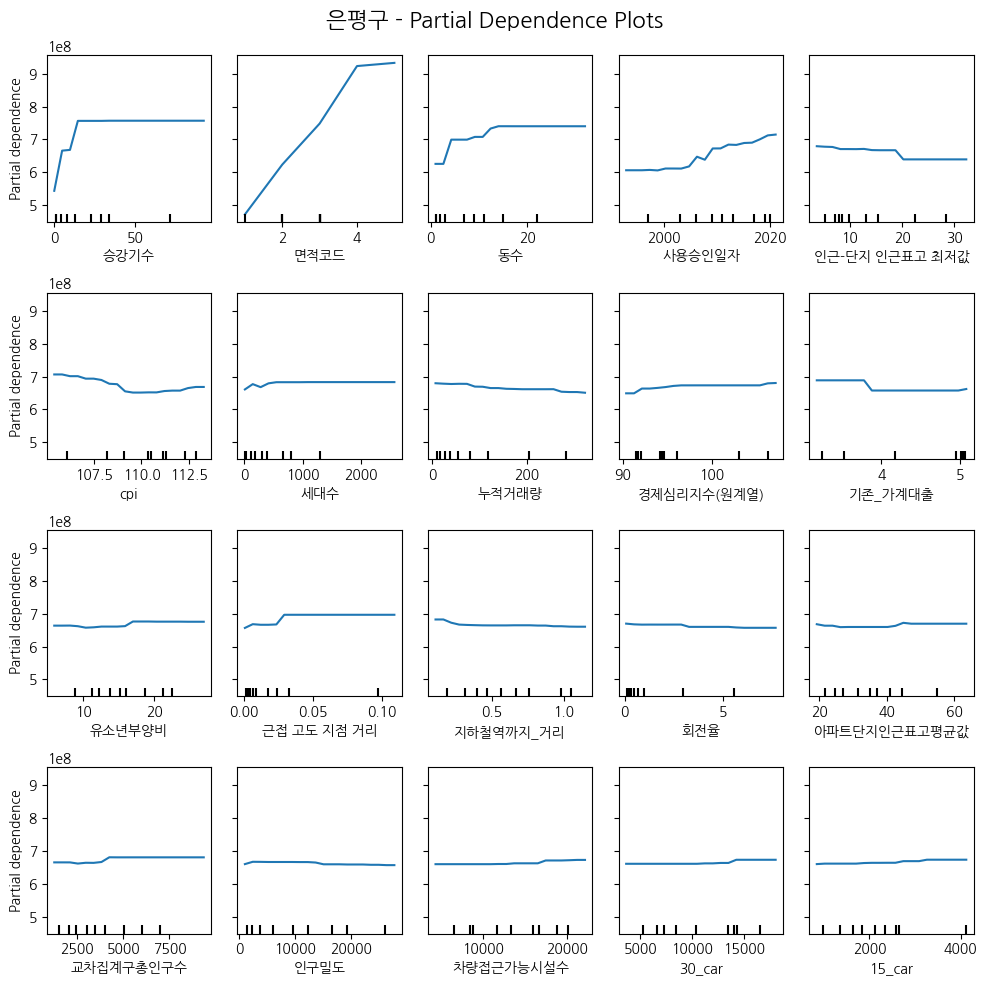


=== 서대문구 분석 결과 ===
RMSE: 149224305.093


<Figure size 2000x1500 with 0 Axes>

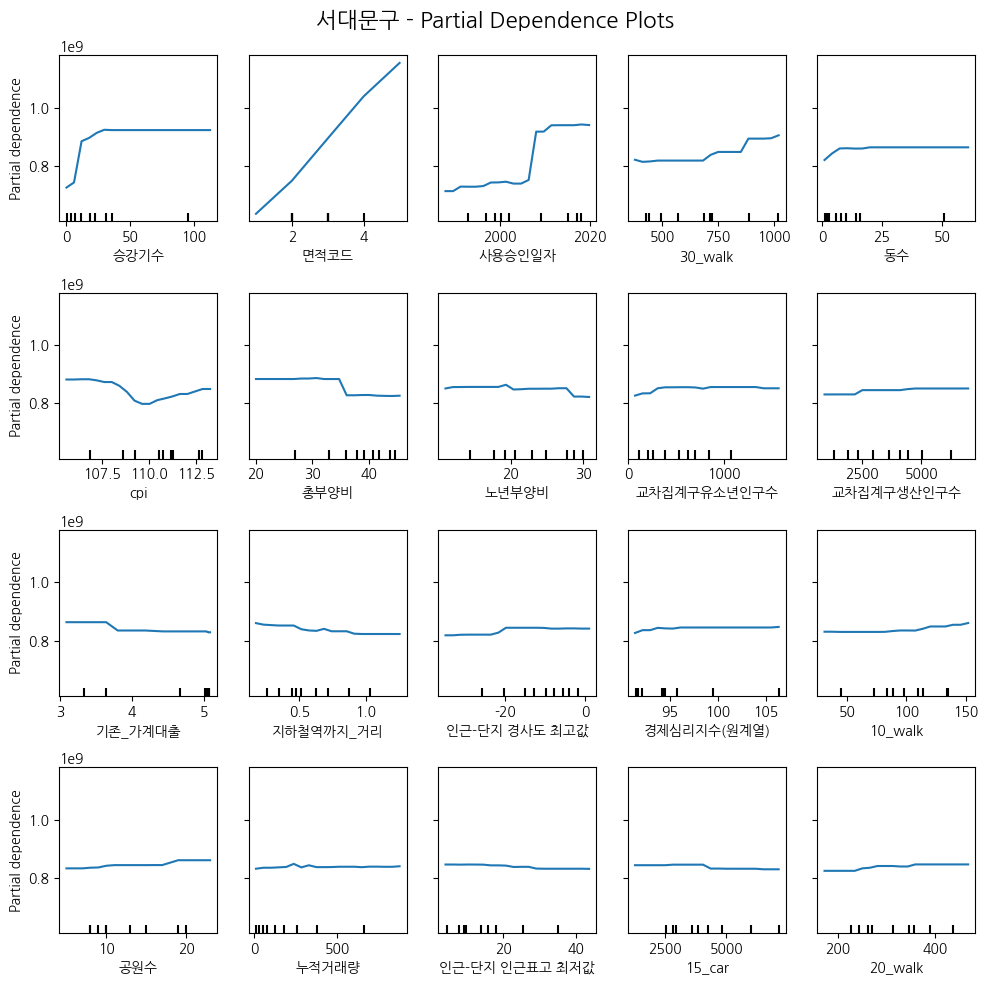


=== 마포구 분석 결과 ===
RMSE: 122633726.092


<Figure size 2000x1500 with 0 Axes>

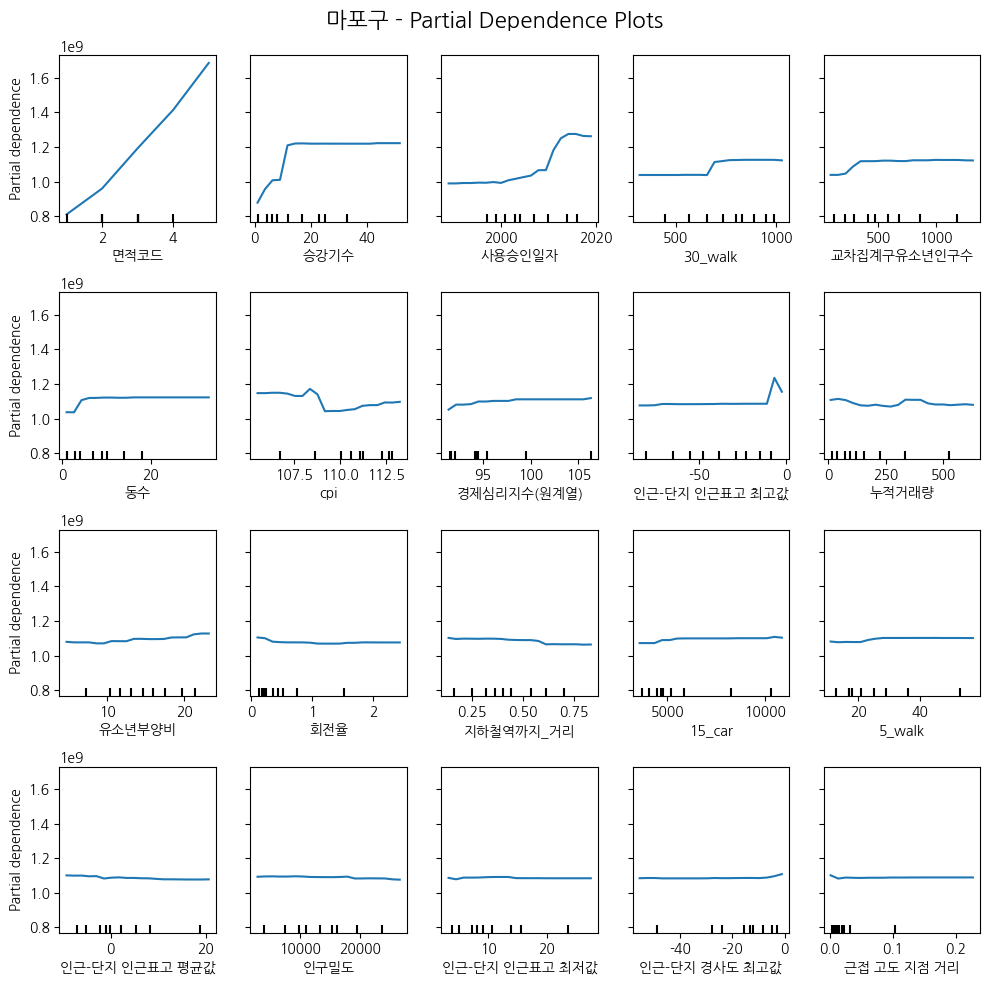


=== 양천구 분석 결과 ===
RMSE: 122084749.528


<Figure size 2000x1500 with 0 Axes>

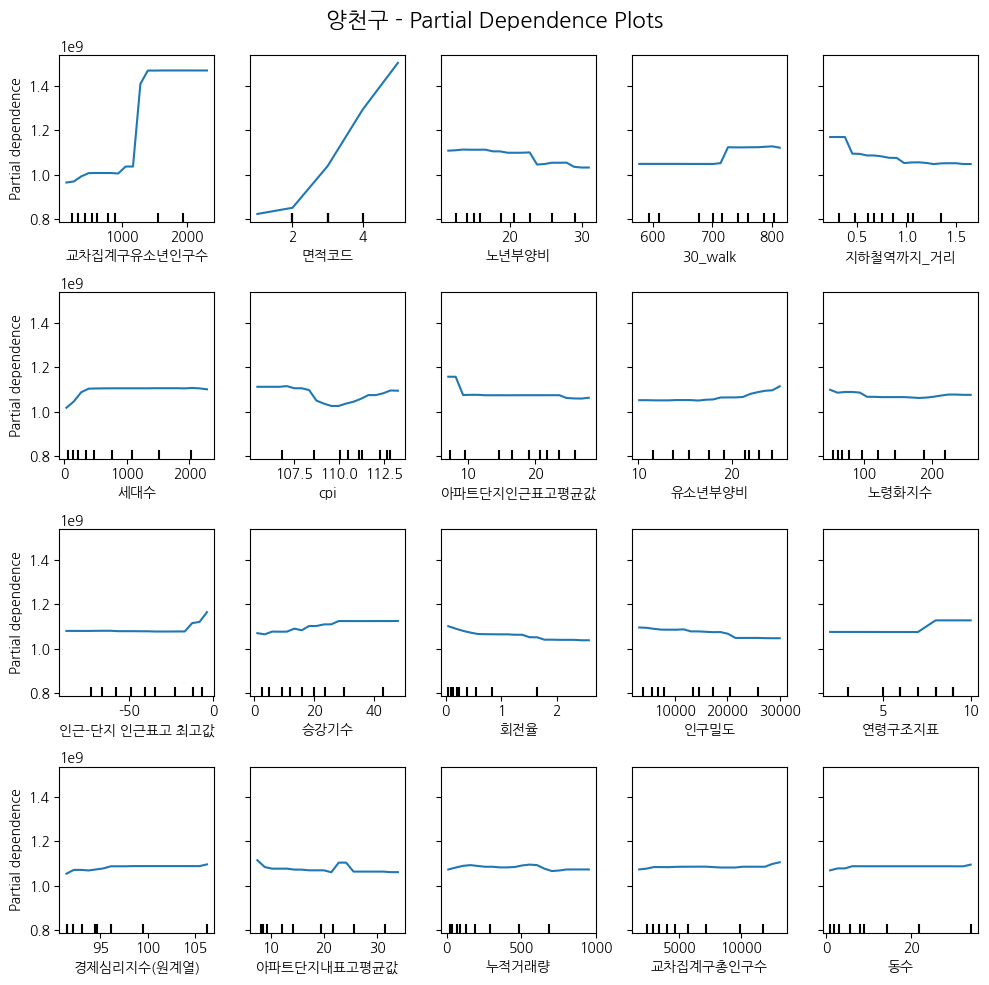


=== 강서구 분석 결과 ===
RMSE: 94196109.102


<Figure size 2000x1500 with 0 Axes>

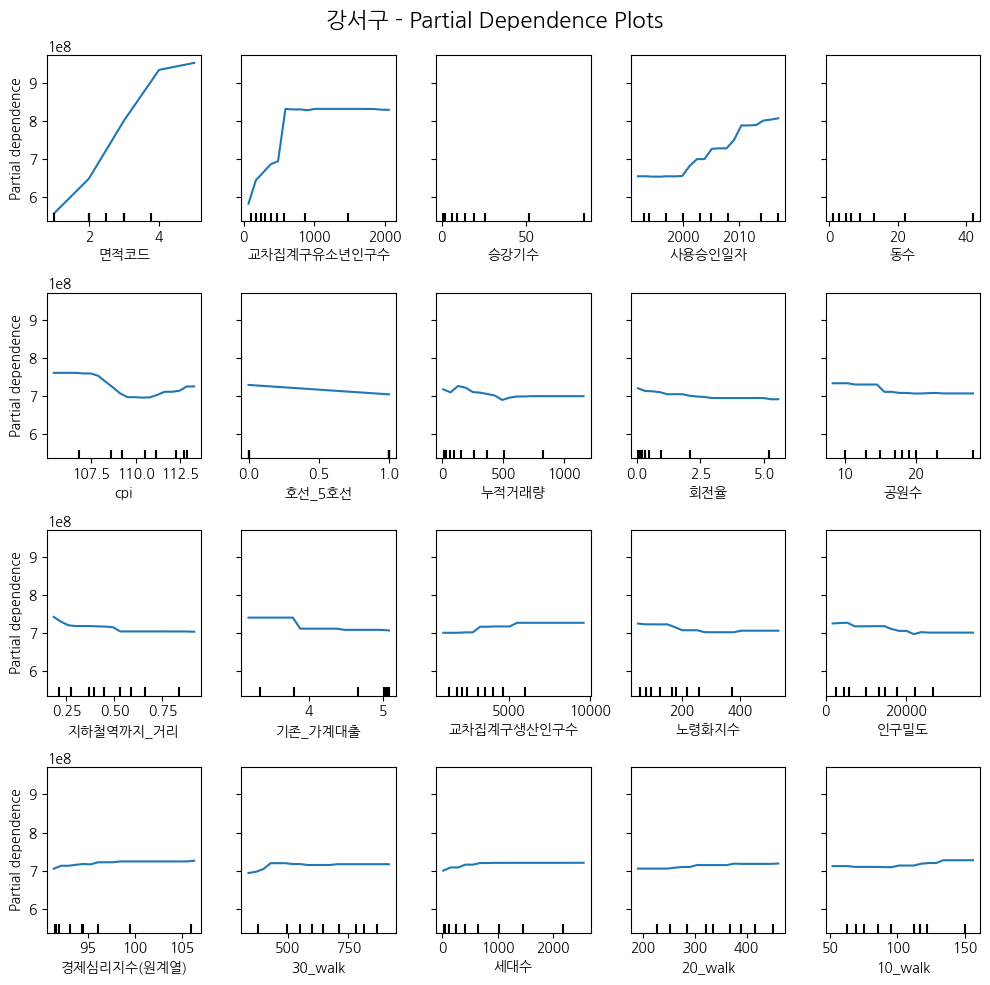


=== 구로구 분석 결과 ===
RMSE: 84818015.362


<Figure size 2000x1500 with 0 Axes>

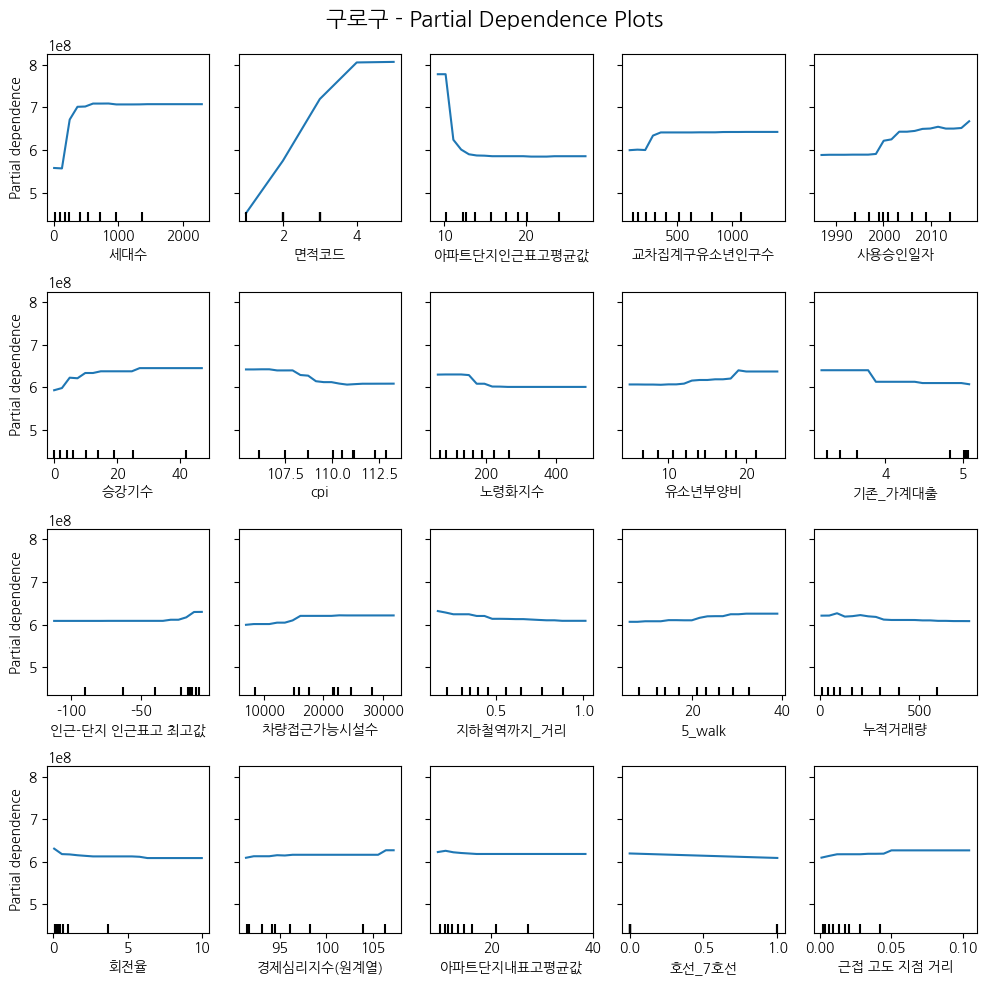


=== 금천구 분석 결과 ===
RMSE: 67666490.169


<Figure size 2000x1500 with 0 Axes>

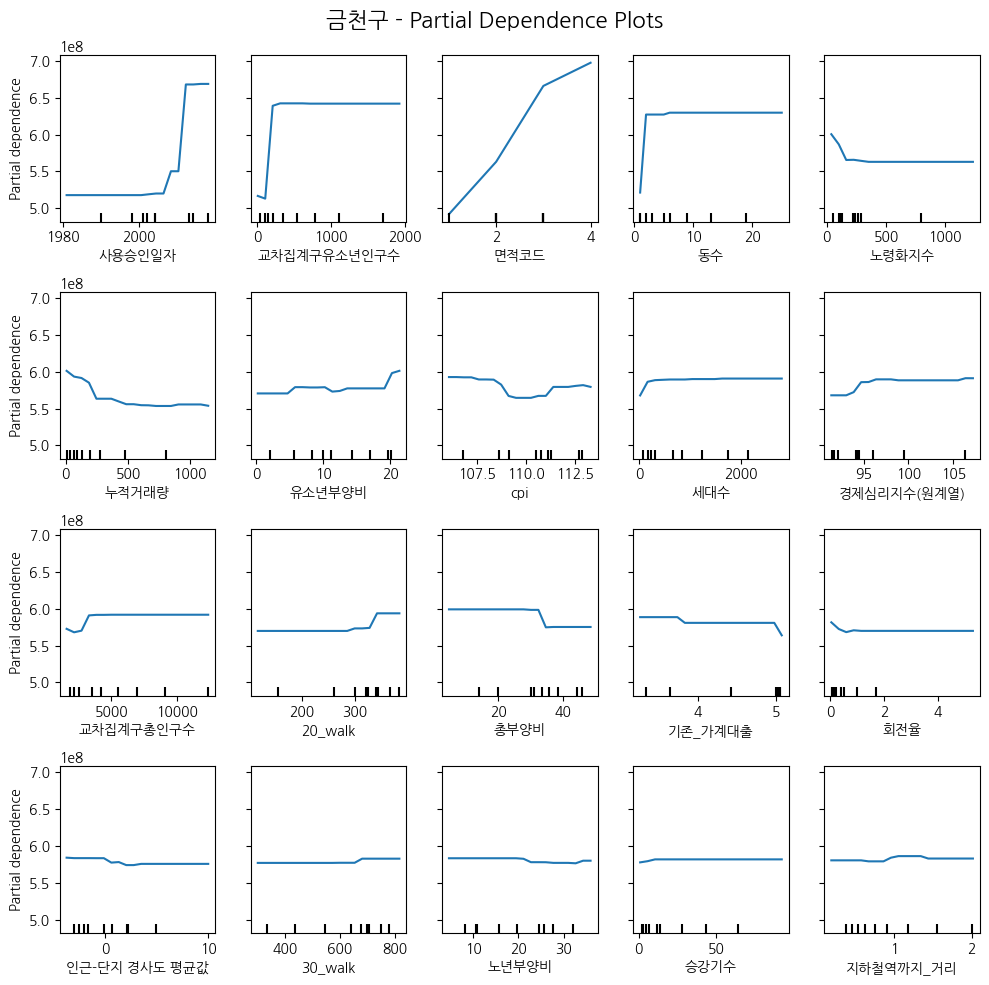


=== 영등포구 분석 결과 ===
RMSE: 178325404.035


<Figure size 2000x1500 with 0 Axes>

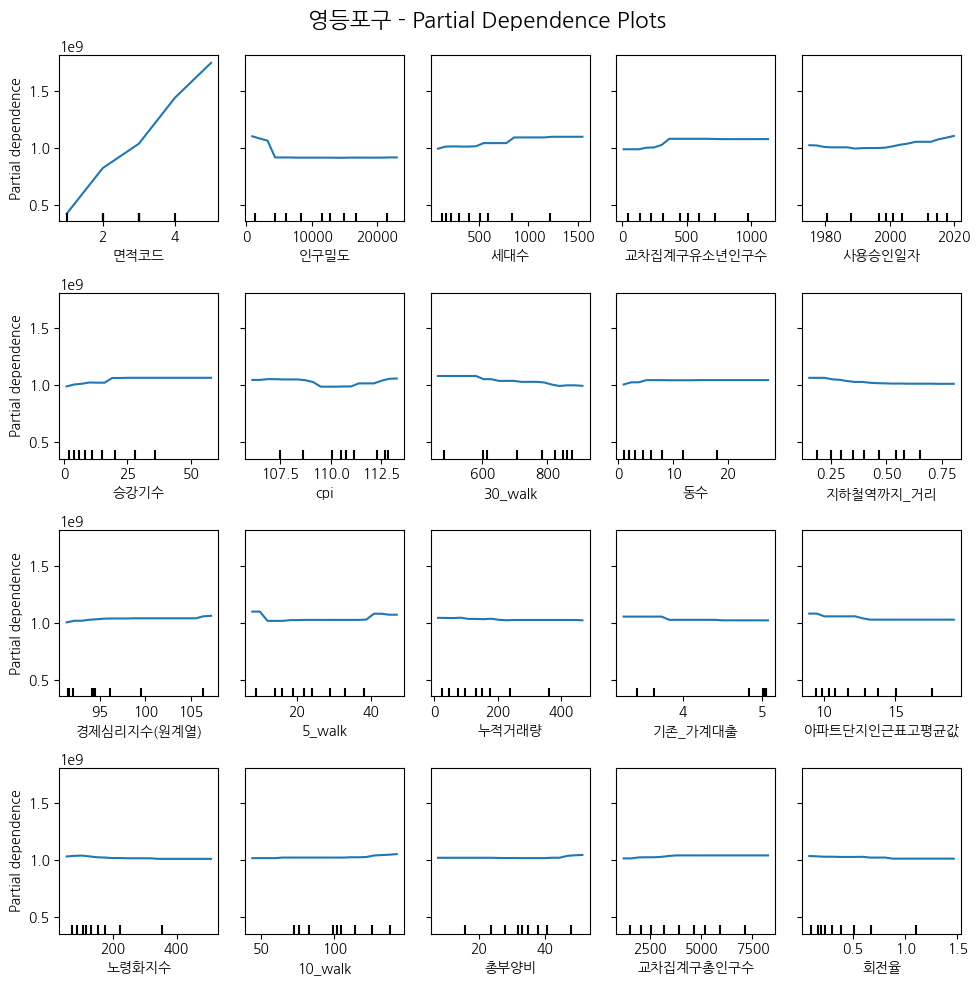


=== 동작구 분석 결과 ===
RMSE: 134760801.559


<Figure size 2000x1500 with 0 Axes>

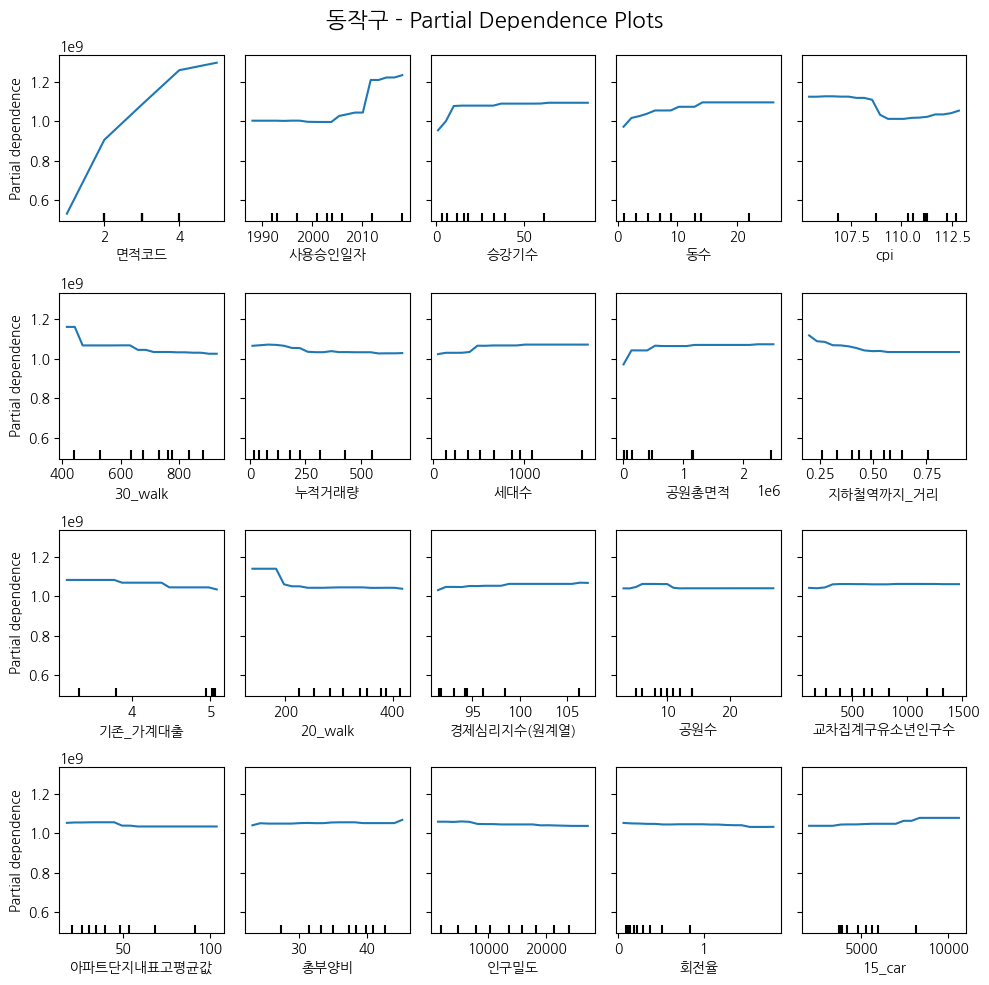


=== 관악구 분석 결과 ===
RMSE: 95962414.639


<Figure size 2000x1500 with 0 Axes>

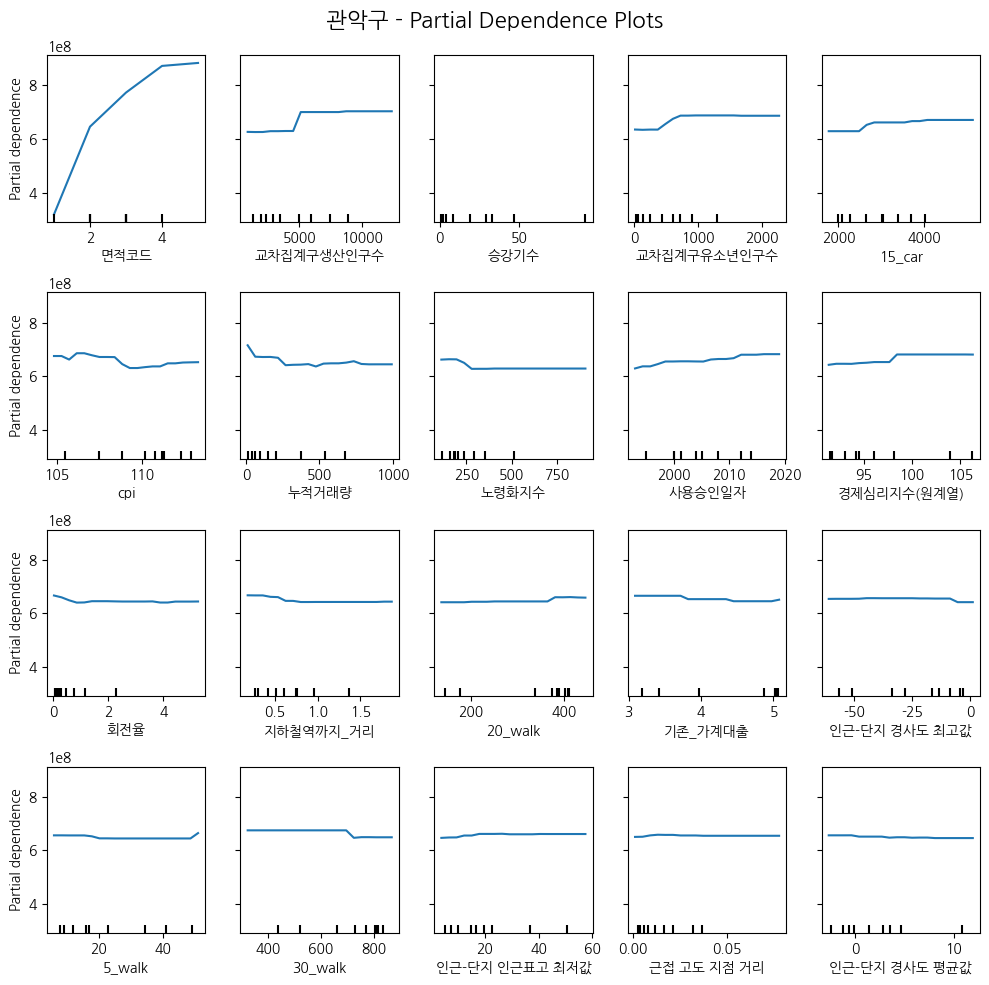


=== 서초구 분석 결과 ===
RMSE: 464939175.331


<Figure size 2000x1500 with 0 Axes>

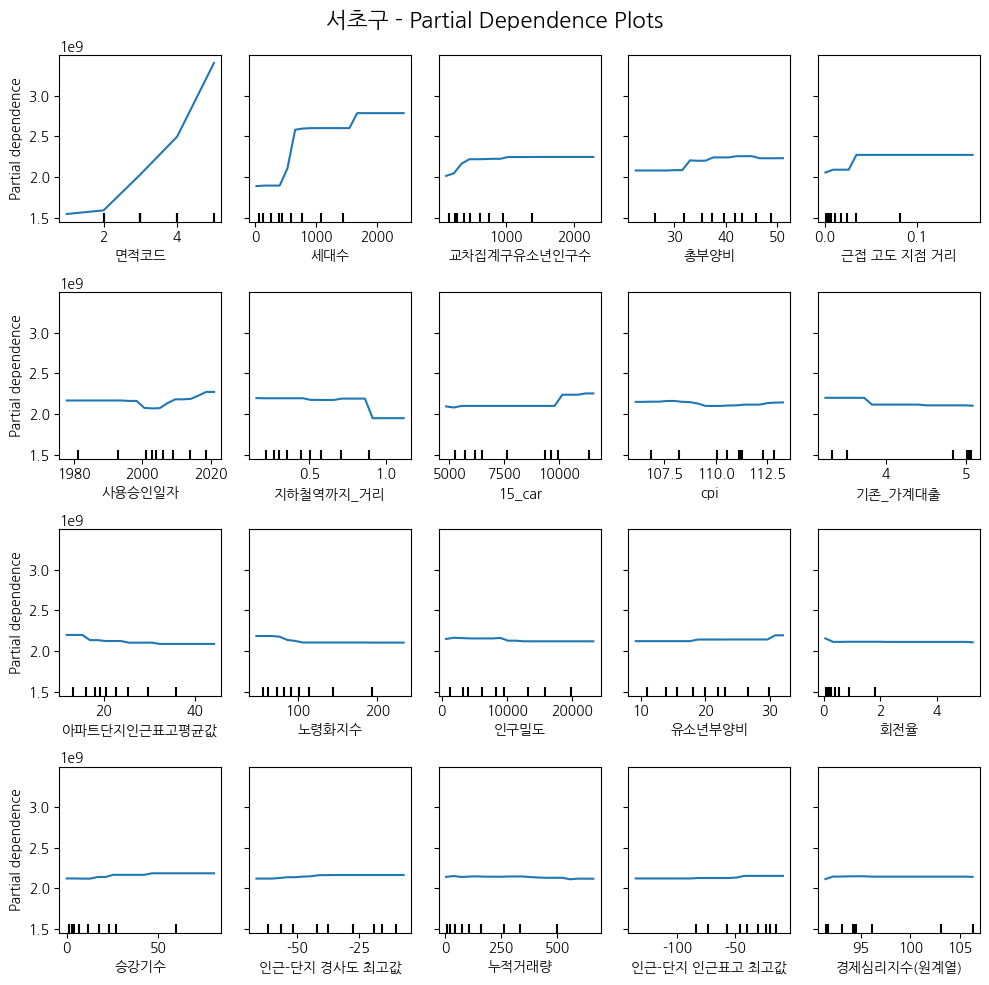


=== 강남구 분석 결과 ===
RMSE: 619759335.724


<Figure size 2000x1500 with 0 Axes>

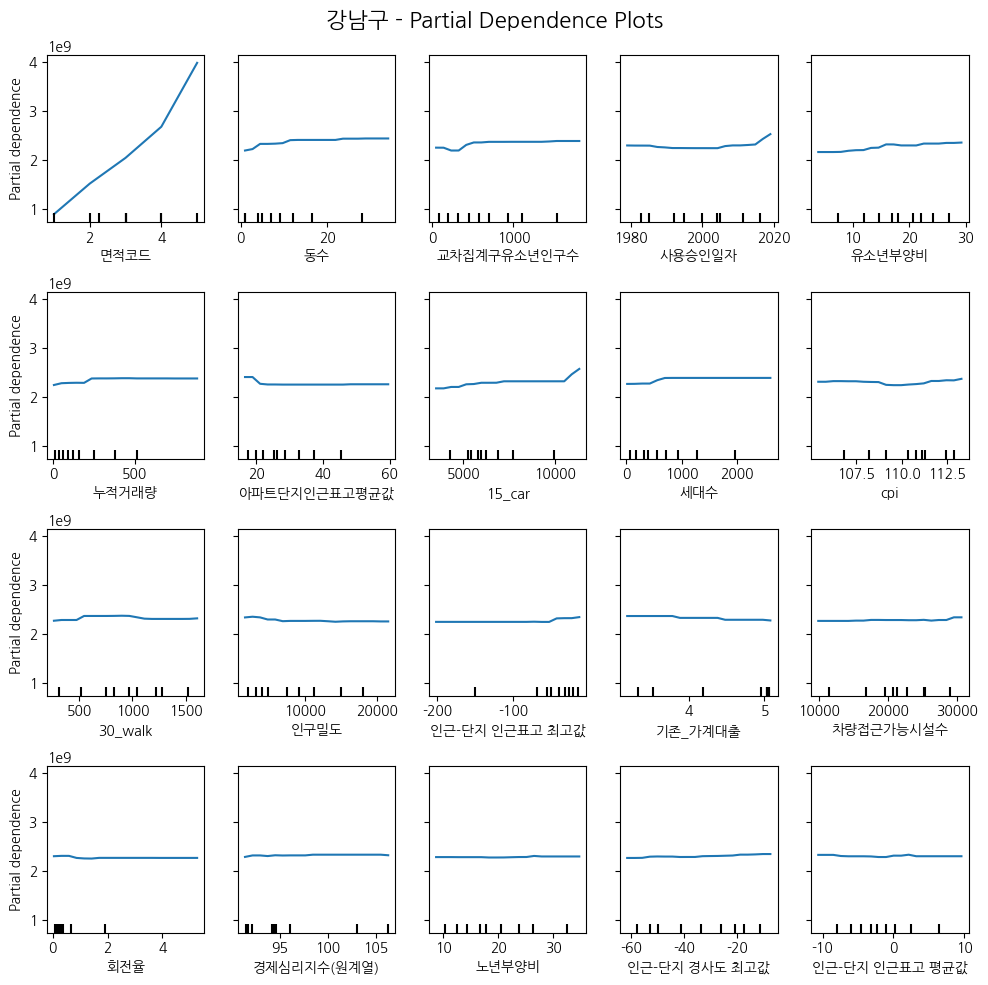


=== 송파구 분석 결과 ===
RMSE: 191619213.911


<Figure size 2000x1500 with 0 Axes>

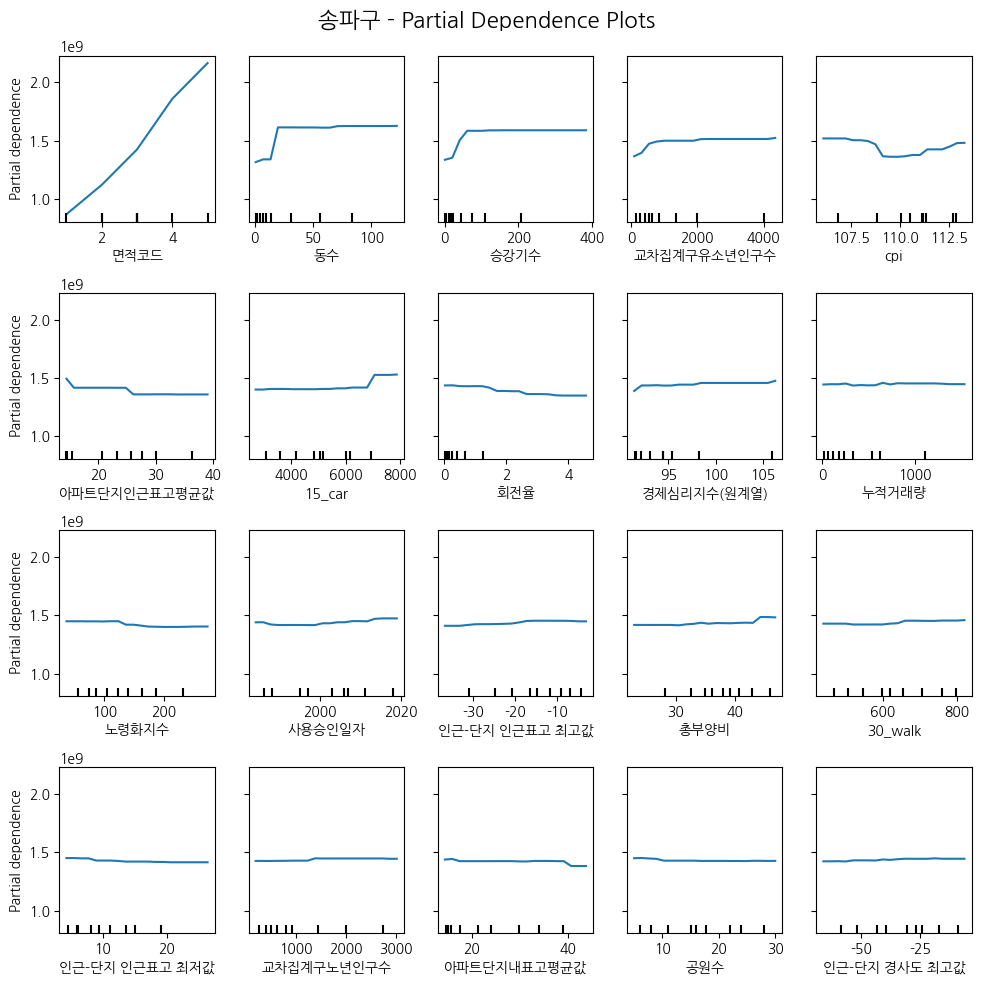


=== 강동구 분석 결과 ===
RMSE: 93427027.791


<Figure size 2000x1500 with 0 Axes>

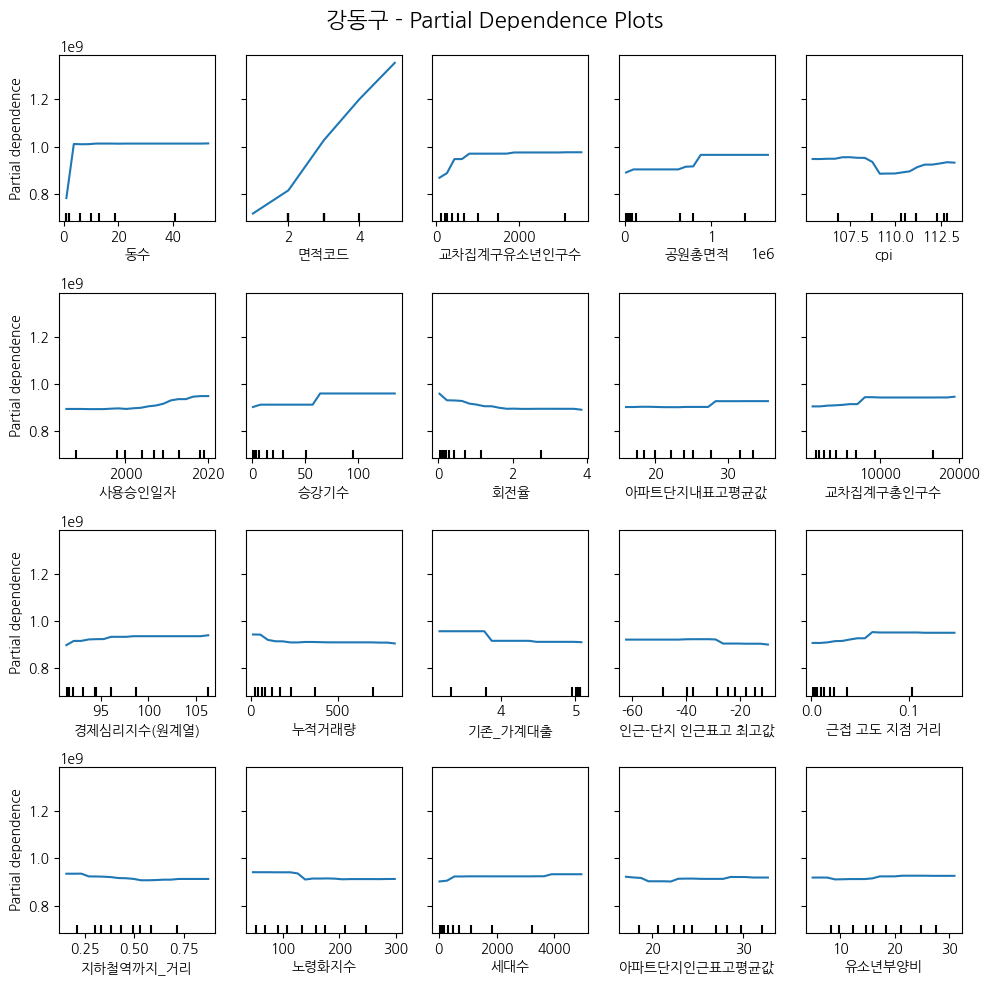

In [56]:
import warnings
warnings.filterwarnings(action='ignore')

def local_train(local):
    print(f"\n=== {local} 분석 결과 ===")
    
    df_local = df[df['자치구명']==local].copy()
    df_local.drop(columns='자치구명',inplace=True)
    
    model = XGBRegressor(
        tree_method='hist',
        device='cuda',
        n_estimators=4000,
        random_state=42
    )

    X_train, X_test, Y_train, Y_test = train_test_split(df_local.iloc[:,:-1], df_local.iloc[:,-1], test_size=0.2, random_state=42)
    X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

    model.fit(X_tr, Y_tr, eval_set=[(X_tr, Y_tr),(X_val, Y_val)], eval_metric='rmse', early_stopping_rounds=300, verbose=False)
    rmse = mean_squared_error(Y_test, model.predict(X_test), squared=False)
    print(f'RMSE: {rmse:.3f}')

    # SHAP 값 계산
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    feature_importance = np.abs(shap_values).mean(0)
    feature_importance_df = pd.DataFrame({
        'feature': X_test.columns,
        'importance': feature_importance
    })
    
    top_20_features = feature_importance_df.sort_values('importance', ascending=False).head(20)
    features = top_20_features['feature'].tolist()

    # 부분 의존성 플롯 생성
    plt.figure(figsize=(20, 15))
    fig, ax = plt.subplots(4, 5, figsize=(10, 10))
    display = PartialDependenceDisplay.from_estimator(
        model,
        X_test,
        features,
        kind="average",
        subsample=1000,
        n_jobs=-1,
        grid_resolution=20,
        random_state=42,
        ax=ax
    )
    fig.suptitle(f"{local} - Partial Dependence Plots", fontsize=16)
    plt.tight_layout()
    plt.show()

# 모든 자치구에 대해 실행
unique_locals = df['자치구명'].unique()
for local in unique_locals:
    local_train(local)